In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
p = Path("C:/Users/k/Desktop/GitHub/GPS_transport/")

aug_data = pd.read_hdf(p / "processed_data" / "aug_all.h5", key="aug")
segments = pd.read_csv(p / "input_data" / "python" / "segments.csv")
markers = pd.read_csv(p / "input_data" / "python" / "markers.csv")

In [3]:
aug_data = aug_data.loc[:,["segment_id" , "aug_time", "speed"]]
aug_data = aug_data.dropna(subset=["speed"])
aug_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25435205 entries, 0 to 533346
Data columns (total 3 columns):
 #   Column      Non-Null Count     Dtype         
---  ------      --------------     -----         
 0   segment_id  25435205 non-null  uint16        
 1   aug_time    25435205 non-null  datetime64[ns]
 2   speed       25435205 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint16(1)
memory usage: 630.7 MB


In [4]:
selected_segment_id = np.arange(12,20)
print(f"selected segments are:{selected_segment_id}")
aug_data = aug_data.loc[aug_data["segment_id"].isin(selected_segment_id), ["aug_time","speed","segment_id"]]
aug_data = aug_data.sort_values(["segment_id", "aug_time"]).reset_index(drop=True)

selected segments are:[12 13 14 15 16 17 18 19]


In [5]:
aug_data.loc[aug_data["segment_id"] == selected_segment_id[0]].set_index("aug_time").loc["2019-12-03 19:00:00" : "2019-12-03 23:00:00"]

speed  segment_id
aug_time                                           
2019-12-03 19:39:55.780780792  69.18053          12

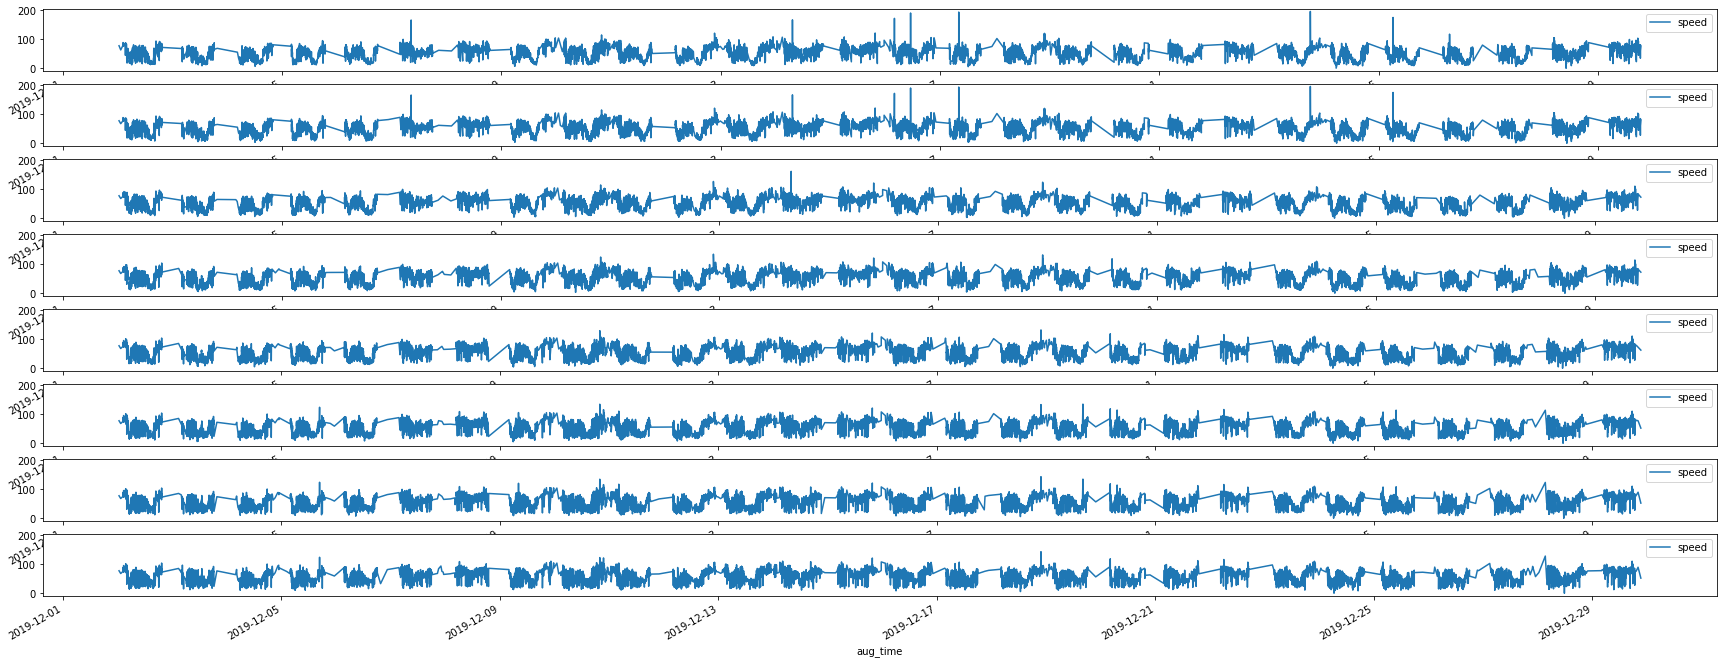

In [6]:
nrows = len(selected_segment_id)

fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[aug_data["segment_id"] == selected_segment_id[i]].set_index("aug_time").plot(ax=ax, y="speed");

In [7]:
# for s_id in selected_segment_id:
#     stationary_check = sm.tsa.stattools.adfuller(aug_data.loc[aug_data["segment_id"] == s_id,"speed"])
#     print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

In [8]:
aug_data

aug_time      speed  segment_id
0      2019-12-02 00:40:51.903121471  78.114306          12
1      2019-12-02 01:25:12.969227791  63.649178          12
2      2019-12-02 02:21:45.043775082  78.644005          12
3      2019-12-02 02:26:43.555198669  89.040089          12
4      2019-12-02 02:39:36.885293007  76.875536          12
...                              ...        ...         ...
148315 2019-12-29 18:37:32.421219826  28.141803          19
148316 2019-12-29 18:48:53.699498177  74.260575          19
148317 2019-12-29 19:15:44.748672485  76.840649          19
148318 2019-12-29 20:05:01.019438744  90.256193          19
148319 2019-12-29 21:18:19.545389175  52.657057          19

[148320 rows x 3 columns]

In [9]:
time_bin = "30T"
aug_data = aug_data.groupby("segment_id").apply(lambda x: x.set_index("aug_time").resample(time_bin)["speed"].mean())
# aug_data = aug_data.T
# aug_data = aug_data.reset_index()
aug_data = aug_data.unstack(0)

In [10]:

aug_data = aug_data.reset_index()

In [11]:
names = ([f"segment_{i}" for i in selected_segment_id])
names.insert(0, "aug_time")
# names.append("int_based")
aug_data.columns = names

In [12]:
aug_data

aug_time  segment_12  segment_13  segment_14  segment_15  \
0    2019-12-02 00:30:00   78.114306   78.114318   78.114311   78.114307   
1    2019-12-02 01:00:00   63.649178   68.003190   68.545695   68.545690   
2    2019-12-02 01:30:00         NaN         NaN         NaN         NaN   
3    2019-12-02 02:00:00   83.842047   83.362057   82.285159   82.285159   
4    2019-12-02 02:30:00   76.875536   76.875541   81.502127   82.088173   
...                  ...         ...         ...         ...         ...   
1333 2019-12-29 19:00:00         NaN         NaN         NaN   79.908194   
1334 2019-12-29 19:30:00         NaN         NaN         NaN         NaN   
1335 2019-12-29 20:00:00         NaN         NaN   73.193863   73.193861   
1336 2019-12-29 20:30:00         NaN         NaN         NaN         NaN   
1337 2019-12-29 21:00:00         NaN         NaN         NaN         NaN   

      segment_16  segment_17  segment_18  segment_19  
0      78.114312   78.114307   78.114310   78.114310  
1      68.545697   68.545695   68.545696   68.545694  
2            NaN         NaN         NaN         NaN  
3      82.285161   82.285156   82.285158   82.285159  
4      84.939526   84.939522   84.939525   84.939523  
...          ...         ...         ...         ...  
1333   79.908201   79.908195   79.510204   76.840649  
1334         NaN         NaN         NaN         NaN  
1335   73.193870   78.008915   90.256195   90.256193  
1336         NaN         NaN         NaN         NaN  
1337   63.054836   52.657055   52.657056   52.657057  

[1338 rows x 9 columns]

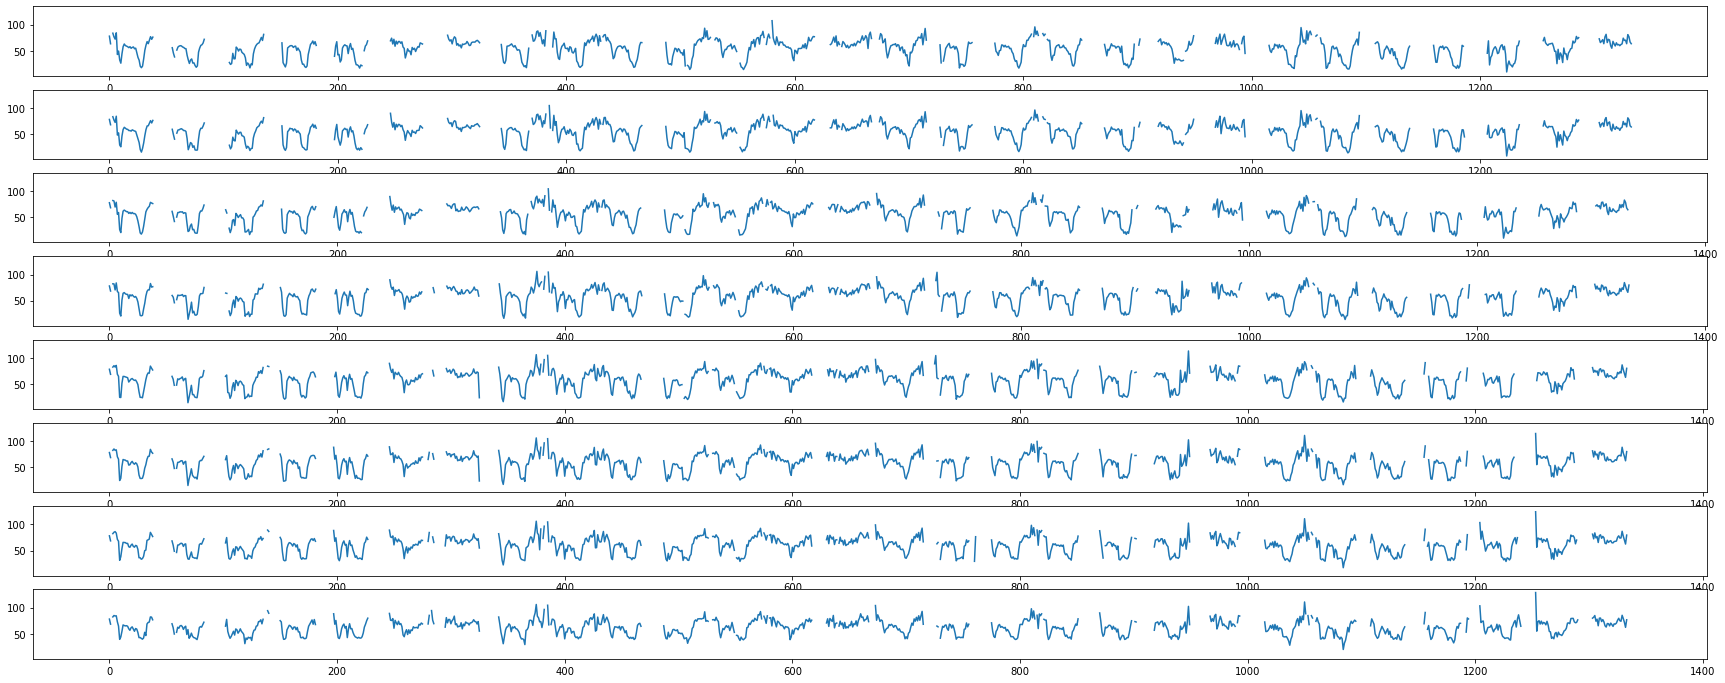

In [13]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax, y="speed");

In [14]:
aug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   aug_time    1338 non-null   datetime64[ns]
 1   segment_12  956 non-null    float64       
 2   segment_13  959 non-null    float64       
 3   segment_14  965 non-null    float64       
 4   segment_15  989 non-null    float64       
 5   segment_16  1004 non-null   float64       
 6   segment_17  1008 non-null   float64       
 7   segment_18  1017 non-null   float64       
 8   segment_19  1025 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 94.2 KB


### Segment located in front of ODTU is selected (dir = 2, polatli > ankara)

### Stationary check
#### (p value < significance level) --> reject stationay --> the series is non-stationary

### Agregation on time bins & NaNs

In [15]:
time_1 = dt.time.fromisoformat("19:00:00")
time_2 = dt.time.fromisoformat("06:00:00")
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.time > time_1) | (aug_data["aug_time"].dt.time < time_2))]
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.weekday == 6) | (aug_data["aug_time"].dt.weekday == 5))]

In [16]:
# aug_data["int_based"] = np.arange(0,len(aug_data))
# aug_data = aug_data.reset_index()
aug_data = aug_data.reset_index(drop=True)
print(aug_data.info())
print(aug_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   aug_time    540 non-null    datetime64[ns]
 1   segment_12  510 non-null    float64       
 2   segment_13  512 non-null    float64       
 3   segment_14  511 non-null    float64       
 4   segment_15  518 non-null    float64       
 5   segment_16  519 non-null    float64       
 6   segment_17  520 non-null    float64       
 7   segment_18  522 non-null    float64       
 8   segment_19  522 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 38.1 KB
None
             aug_time  segment_12  segment_13  segment_14  segment_15  \
0 2019-12-02 06:00:00   44.722729   46.666964   48.237859   51.416755   
1 2019-12-02 06:30:00   58.105187   58.985505   62.058362   64.227061   
2 2019-12-02 07:00:00   63.253963   63.140614   64.053676   65.567092   
3 2019-12-0

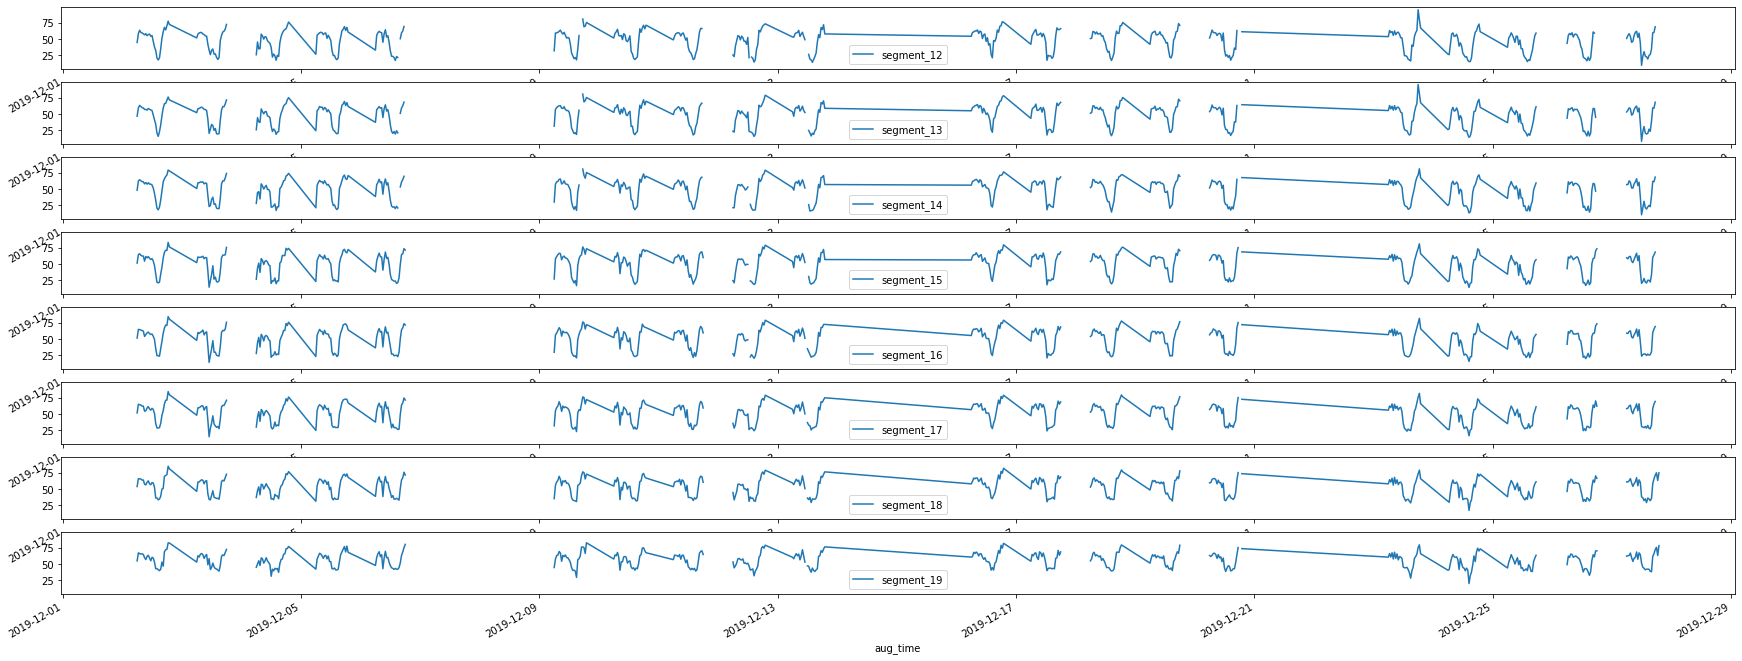

In [17]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data.loc[:, [f"segment_{i}", "aug_time"] ].plot(ax=ax, x="aug_time");

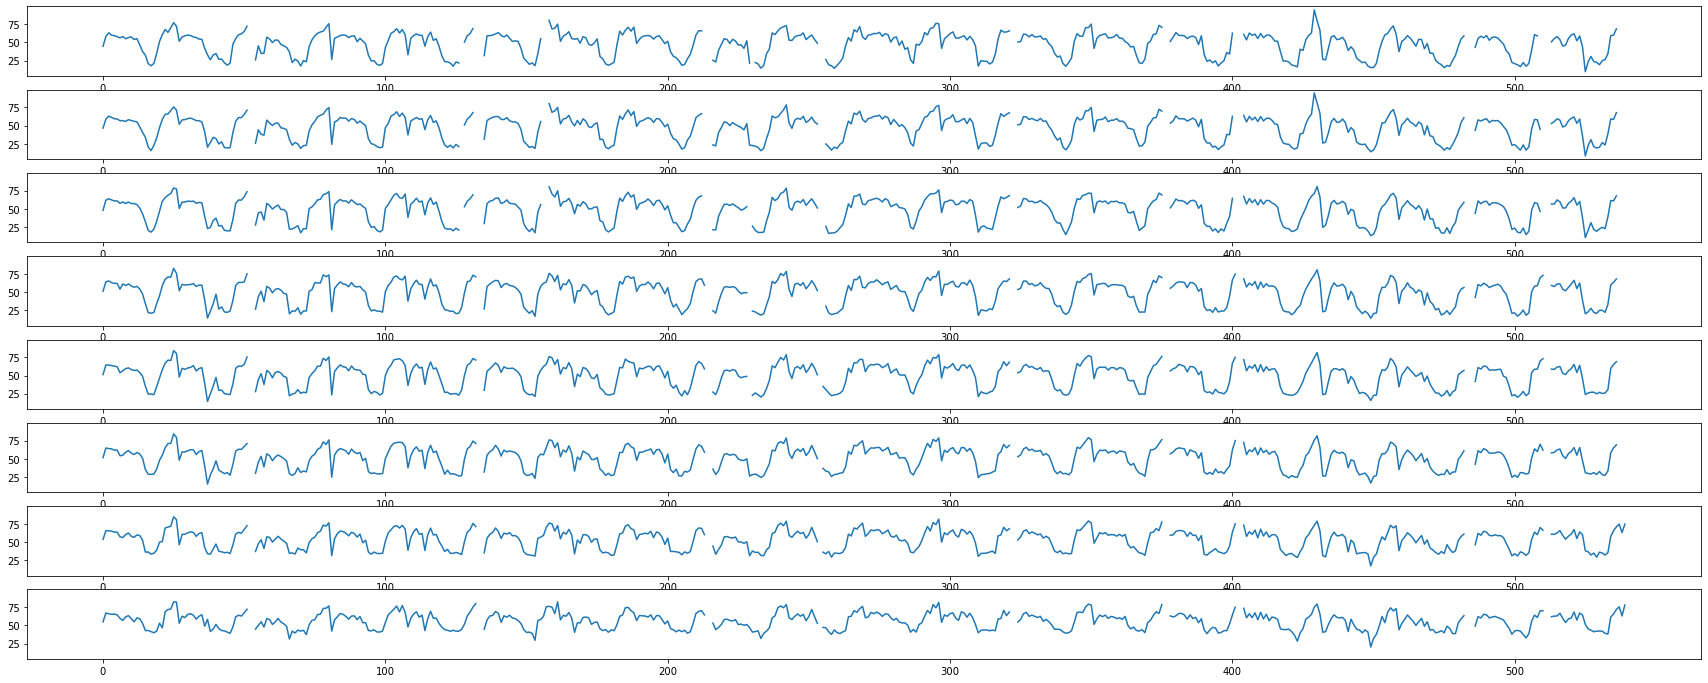

In [18]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [19]:
# print(aug_data.loc[aug_data.isna().sum(axis=1) > 1])
aug_data.isna().sum()


aug_time       0
segment_12    30
segment_13    28
segment_14    29
segment_15    22
segment_16    21
segment_17    20
segment_18    18
segment_19    18
dtype: int64

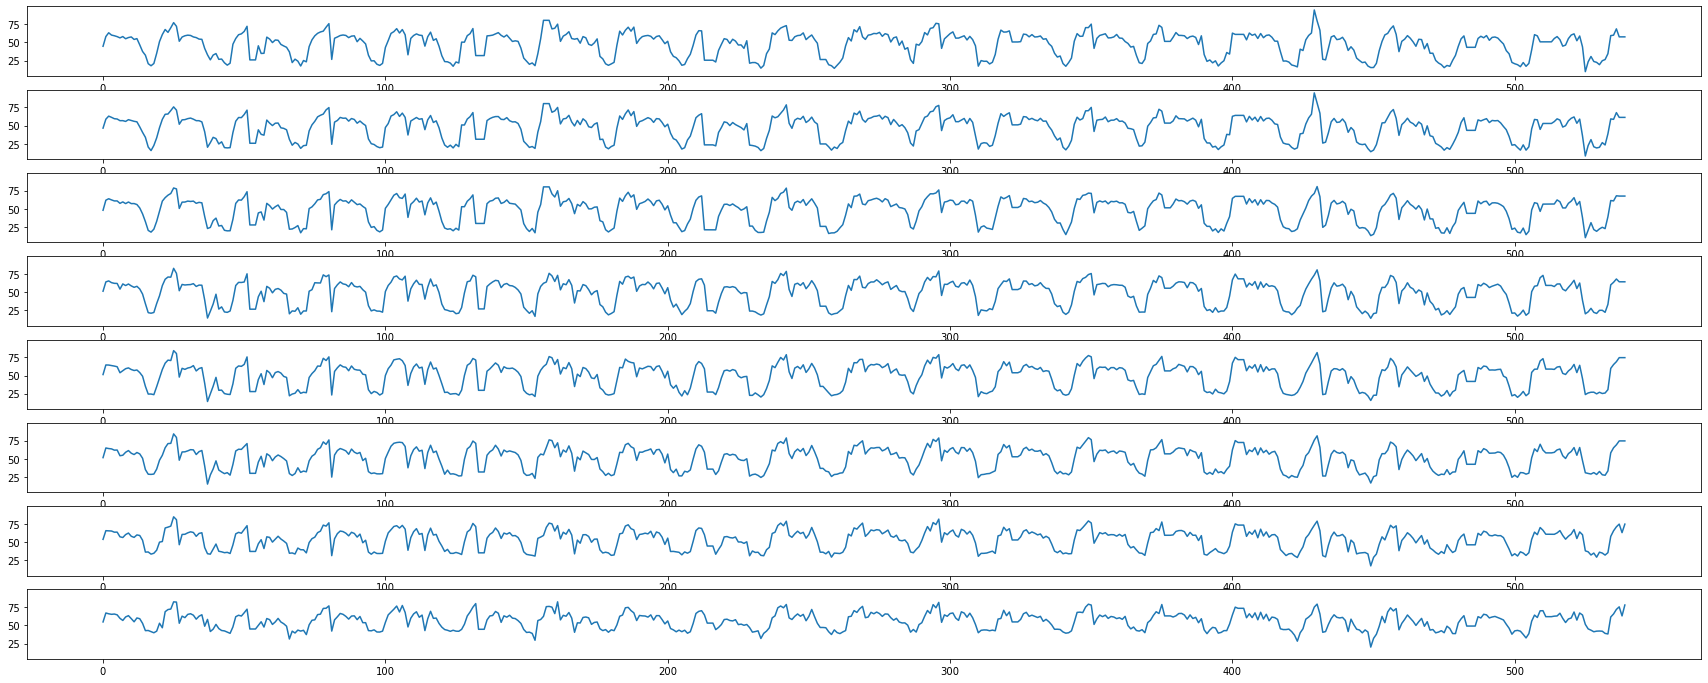

In [20]:
# no need
aug_data = aug_data.fillna(method="bfill").fillna(method="ffill")
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [21]:
for s_id in selected_segment_id:
    stationary_check = sm.tsa.stattools.adfuller(aug_data[f"segment_{s_id}"])
    print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

p value is 6.339170520208637e-15, segment_id = 12 
p value is 3.915986671632156e-15, segment_id = 13 
p value is 1.2562817781874238e-12, segment_id = 14 
p value is 1.4160476082351515e-15, segment_id = 15 
p value is 4.724766238075876e-15, segment_id = 16 
p value is 5.30842872077275e-15, segment_id = 17 
p value is 7.043834086907933e-15, segment_id = 18 
p value is 1.7436493560425824e-15, segment_id = 19 


### Discarding weekend days

#### bir gün 91 datapoint

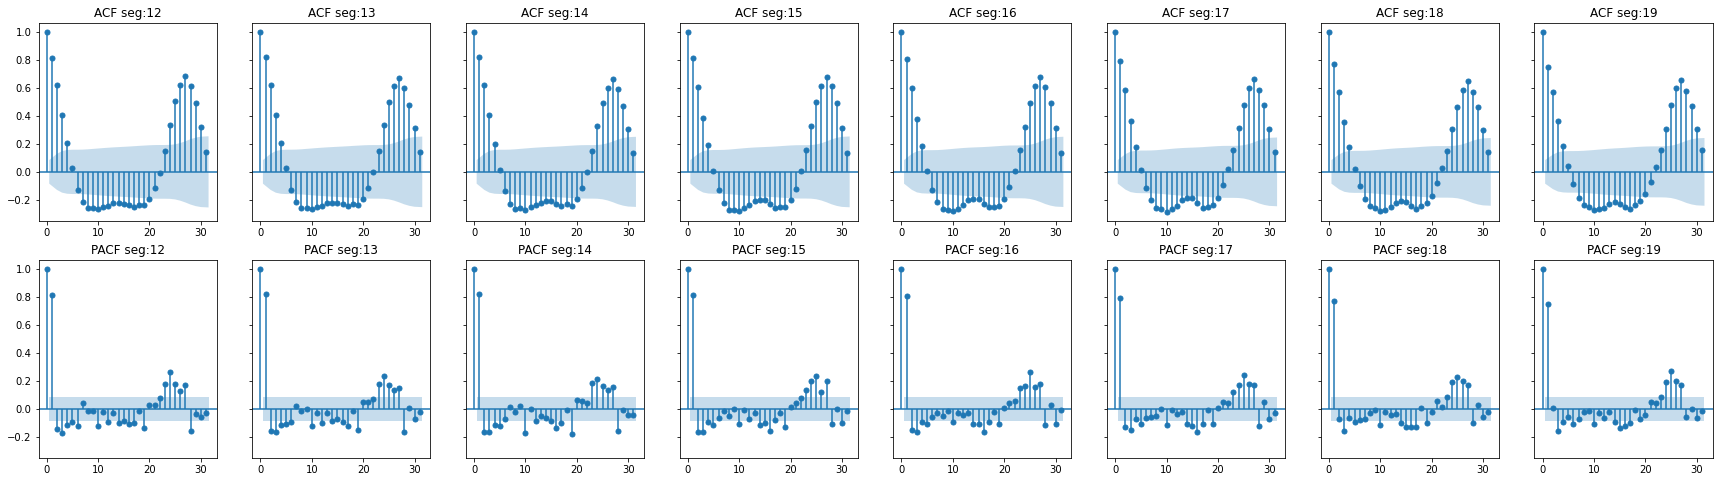

In [22]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"], lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"], lags=lags, ax=ax2, title=f"PACF seg:{i}");

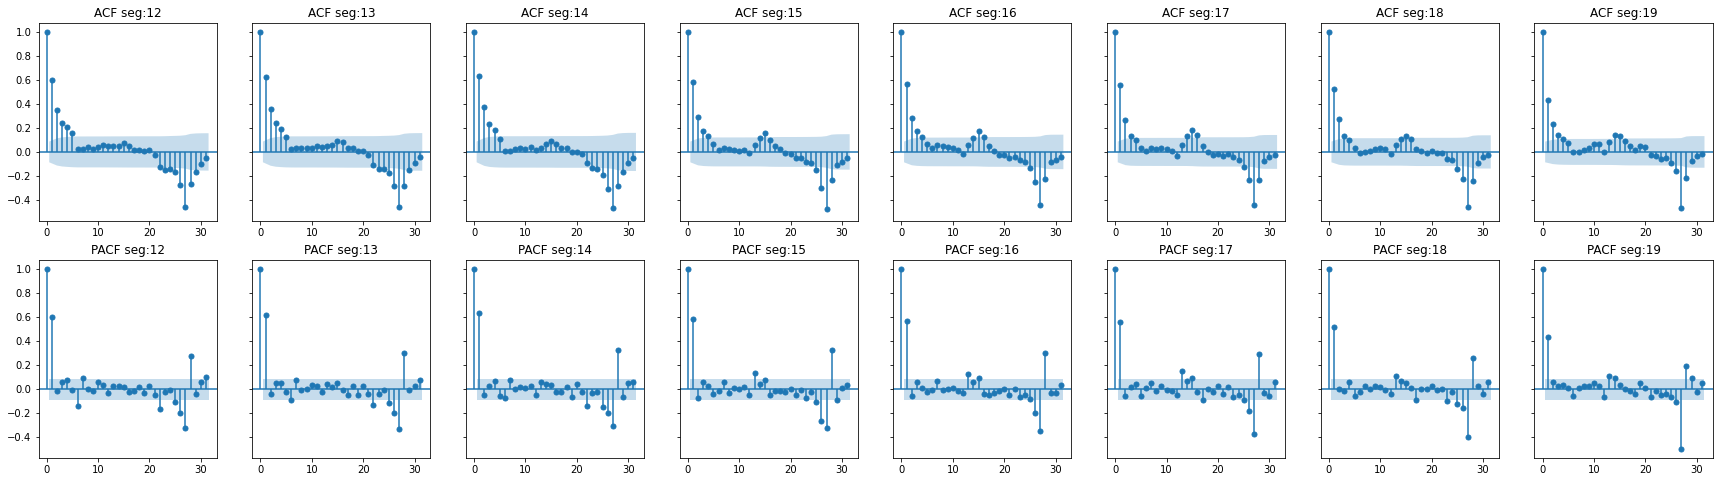

In [23]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff(27).dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff(27).dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

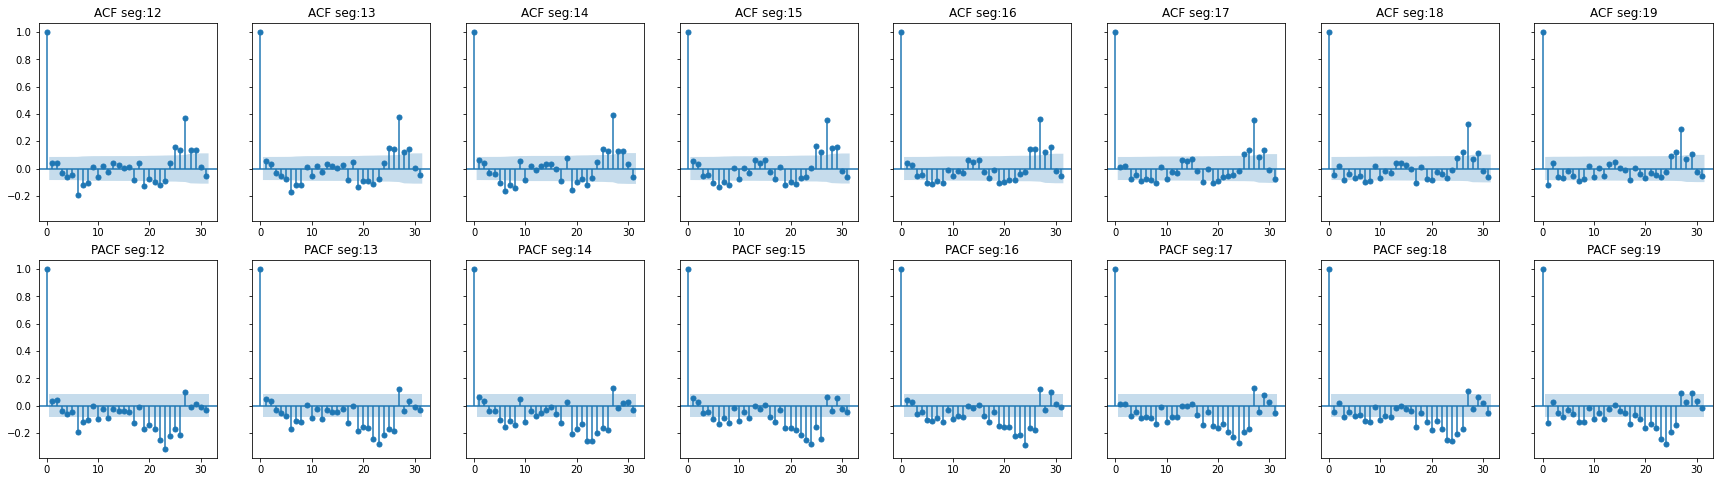

In [24]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

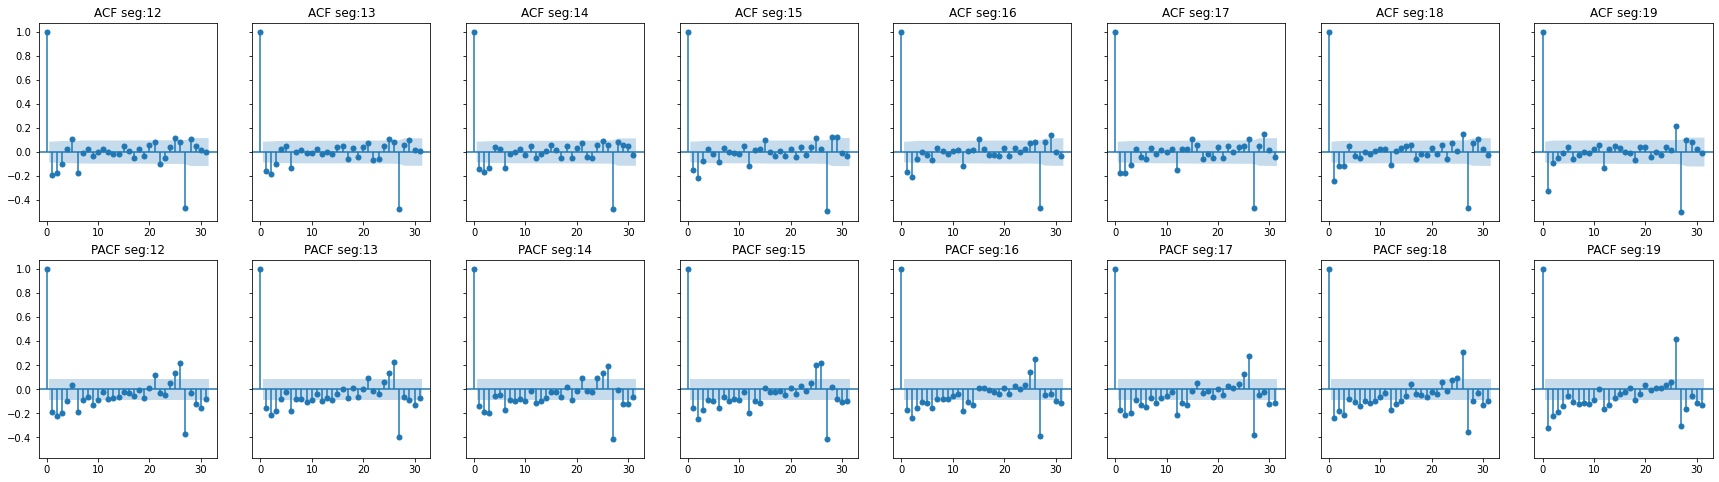

In [25]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff(27).diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff(27).diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

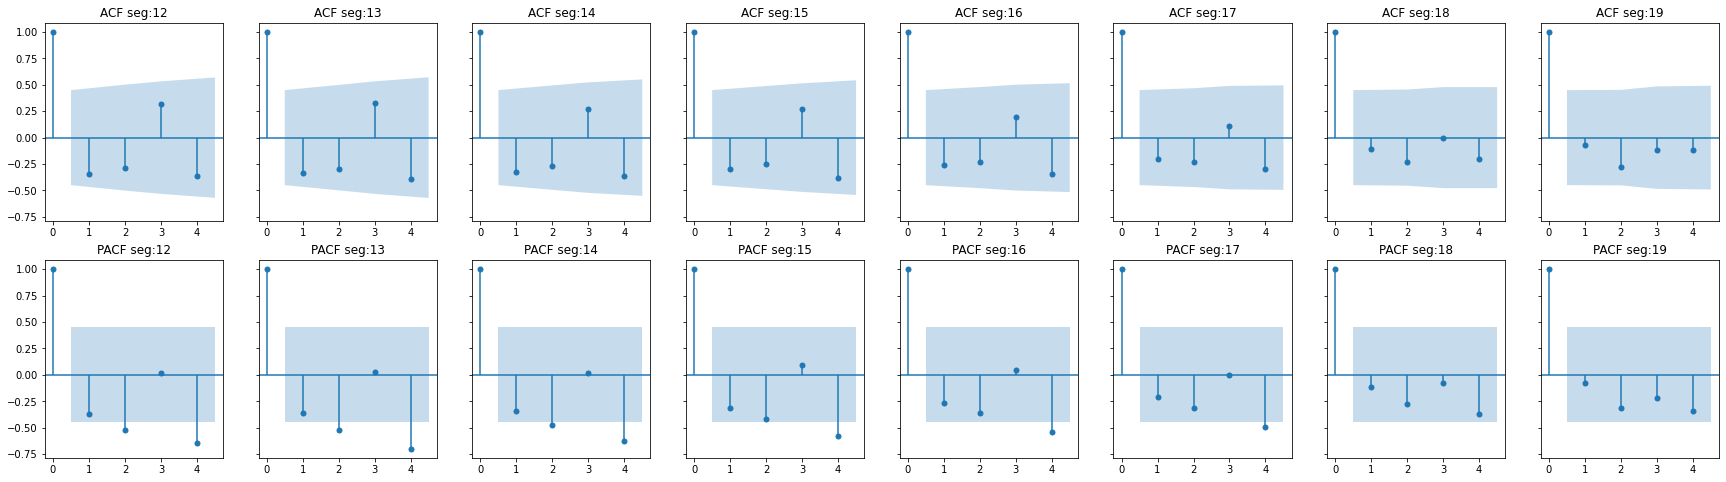

In [26]:
lags=np.arange(0,len(aug_data.iloc[::27,0])/4,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data.iloc[::27,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data.iloc[::27,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");



# fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
# for i, ax in enumerate(axes[0]):
#     sm.graphics.tsa.plot_acf(aux_data.iloc[::29,i], lags=lags, ax=axes[0][i],title=f"ACF segment:{selected_segment_id[i]}");
#     sm.graphics.tsa.plot_pacf(aux_data.iloc[::29,i], lags=lags, ax=axes[1][i],title=f"PACF segment:{selected_segment_id[i]}");


In [27]:
def get_arima(series, seasonal_lag, p, d, q, sp, sd, sq):
    
    model = sm.tsa.statespace.SARIMAX(series, order=(p, d, q), seasonal_order=(sp,sd,sq,seasonal_lag), trend="c")
    results = model.fit(maxiter=100)
    return p, d, q, sp, sd, sq, results, model

    
def arima_grid(series, seasonal_lag, arima_coef, seasonal_coef):
    
    out = []
    
    input_p, input_d, input_q = arima_coef
    input_sp, input_sd, input_sq = seasonal_coef
    
    for p in input_p:
        for d in input_d:
            for q in input_q:
                for sp in input_sp:
                    for sd in input_sd:
                        for sq in input_sq:
                            result = get_arima(series, seasonal_lag, p, d, q, sp, sd, sq)
                            result.append(result[-2].aic)
                            result.append(result[-3].bic)
                            out.append(result)
    return out

In [28]:
selected_segment_id

array([12, 13, 14, 15, 16, 17, 18, 19])

In [29]:
aug_data

aug_time  segment_12  segment_13  segment_14  segment_15  \
0   2019-12-02 06:00:00   44.722729   46.666964   48.237859   51.416755   
1   2019-12-02 06:30:00   58.105187   58.985505   62.058362   64.227061   
2   2019-12-02 07:00:00   63.253963   63.140614   64.053676   65.567092   
3   2019-12-02 07:30:00   60.094236   61.491297   62.467802   63.207307   
4   2019-12-02 08:00:00   59.187956   59.622095   61.062848   62.237149   
..                  ...         ...         ...         ...         ...   
535 2019-12-27 17:00:00   59.961478   58.730447   61.077811   63.678284   
536 2019-12-27 17:30:00   68.635532   67.972740   68.106396   68.210774   
537 2019-12-27 18:00:00   57.651806   61.433779   67.730603   64.354497   
538 2019-12-27 18:30:00   57.651806   61.433779   67.730603   64.354497   
539 2019-12-27 19:00:00   57.651806   61.433779   67.730603   64.354497   

     segment_16  segment_17  segment_18  segment_19  
0     51.330338   51.603368   53.714197   54.678254  
1     64.514188   64.855935   65.642707   66.973878  
2     64.390736   64.074163   65.466255   65.886094  
3     63.670687   63.620705   65.192888   65.152104  
4     62.982029   61.880300   63.597488   65.541210  
..          ...         ...         ...         ...  
535   65.069888   65.142058   65.500342   65.658069  
536   69.006295   69.182886   70.942653   71.895018  
537   74.569168   74.569172   74.670781   75.407743  
538   74.569168   74.569172   62.961706   62.961711  
539   74.569168   74.569172   74.659934   77.944207  

[540 rows x 9 columns]

In [30]:
seasonal_lag = 27
# i = 48
p, d, q = 2, 0, 0
sp, sd, sq = 1, 0, 1
results = {}
results["12"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_12"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["13"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_13"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["14"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_14"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["15"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_15"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["16"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_16"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["17"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_17"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["18"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_18"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
results["19"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_19"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)


C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\tsa\s

## do not forget to set seasonal_lag in accordanve with time bin

{'fopt': 3.4602750924483265, 'gopt': array([-0.11898695,  0.00453162,  0.00190478,  0.00042895, -0.00106855,
       -0.00012691]), 'fcalls': 875, 'warnflag': 1, 'converged': False, 'iterations': 100}
{'fopt': 3.4595408972685564, 'gopt': array([ 3.09325683e-02,  2.09147348e-03,  6.75552023e-03,  2.08247197e-05,
       -4.96716046e-04, -2.54311683e-05]), 'fcalls': 889, 'warnflag': 1, 'converged': False, 'iterations': 100}
{'fopt': 3.487355726764238, 'gopt': array([-0.04425062, -0.00028995,  0.00964484,  0.00018735, -0.00097029,
        0.00158338]), 'fcalls': 826, 'warnflag': 1, 'converged': False, 'iterations': 100}
{'fopt': 3.5008270378525483, 'gopt': array([-0.02444604,  0.00129846, -0.00249078,  0.00035074,  0.00045007,
        0.00069363]), 'fcalls': 994, 'warnflag': 1, 'converged': False, 'iterations': 100}
{'fopt': 3.4799007682846974, 'gopt': array([-1.89327739e-02,  2.14119744e-04,  7.36782191e-05,  1.53937929e-04,
       -1.24522299e-03,  6.53302168e-04]), 'fcalls': 777, 'warnfl

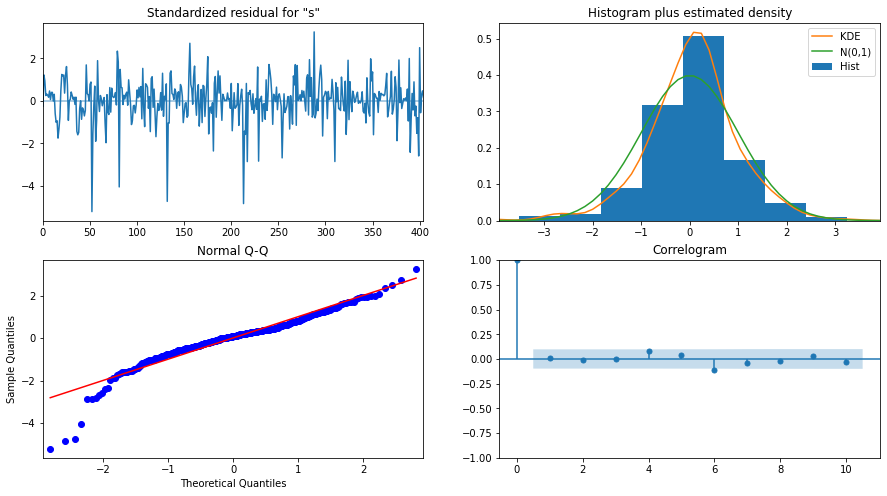

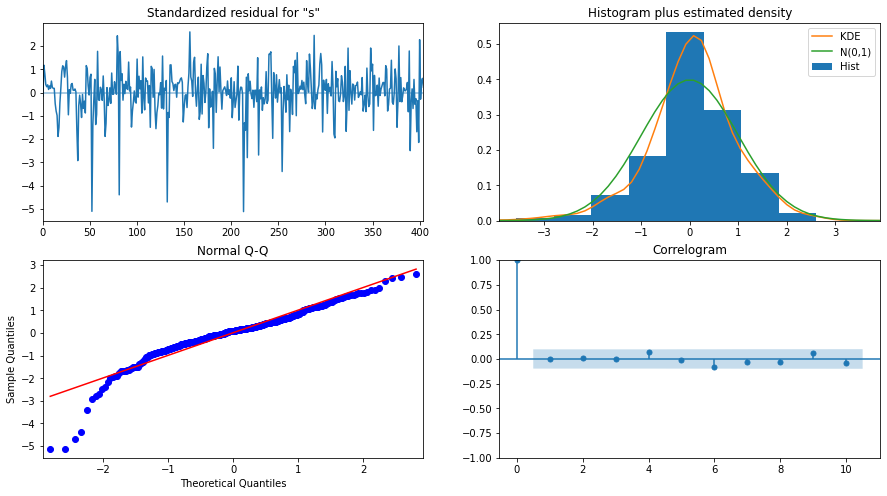

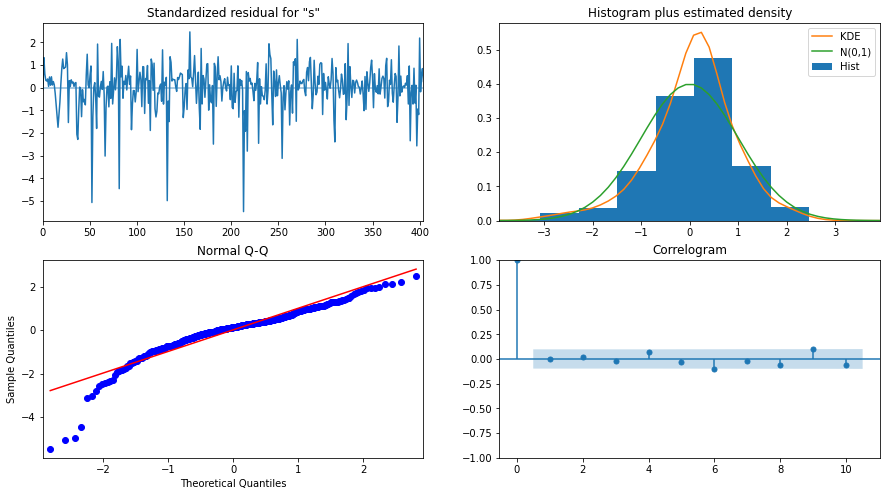

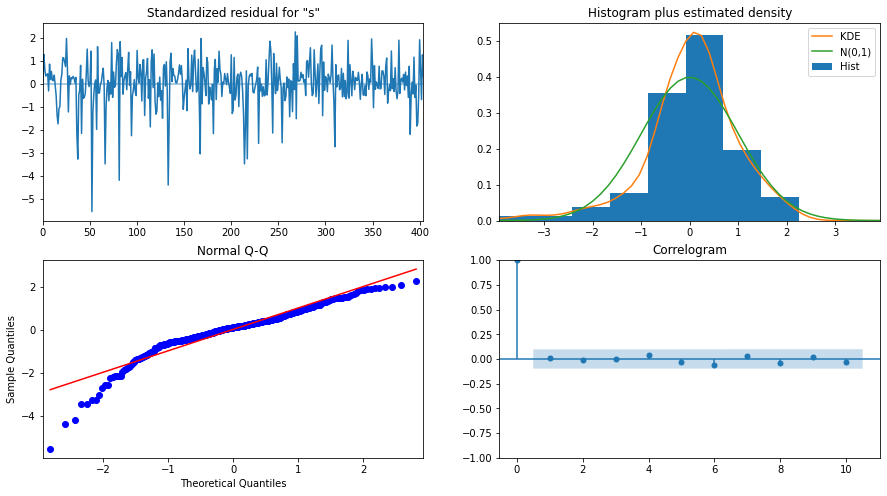

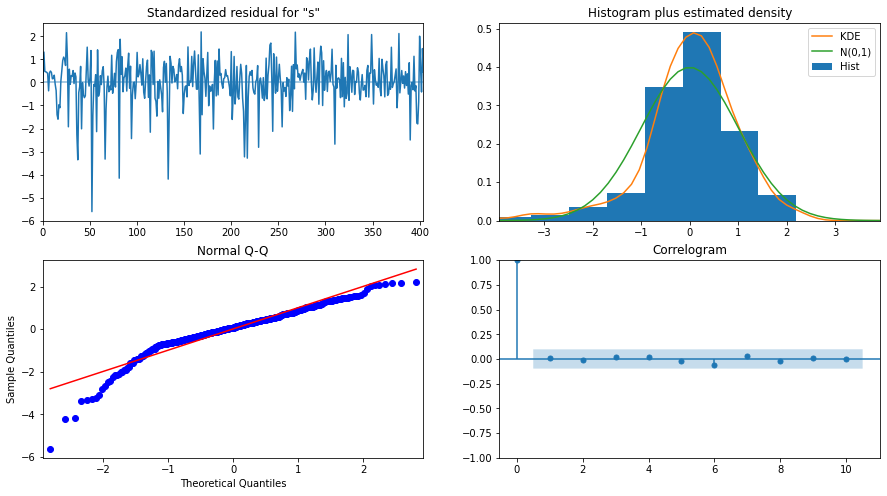

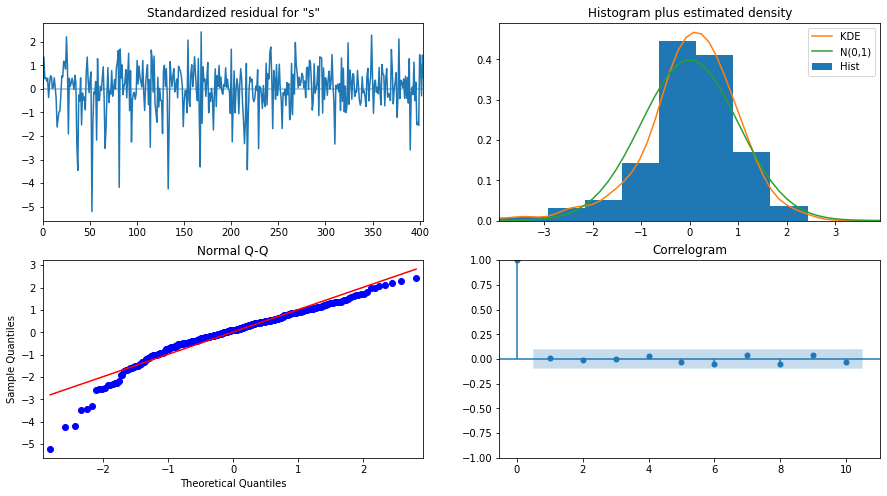

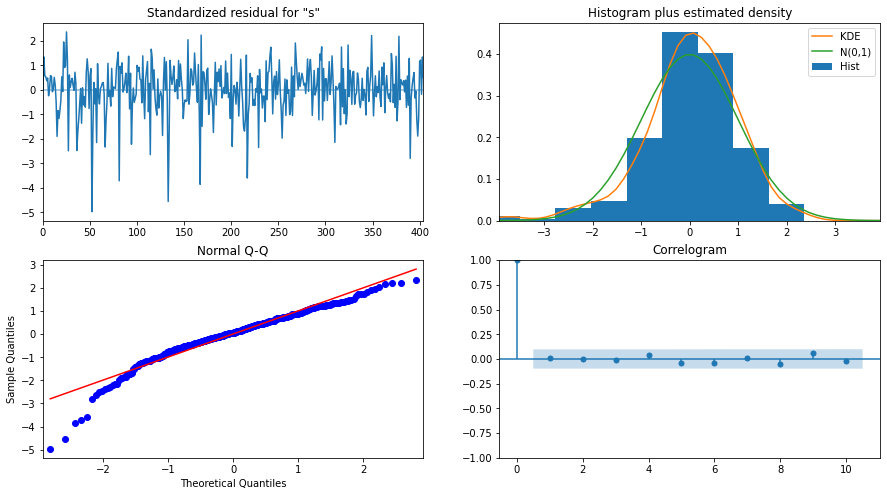

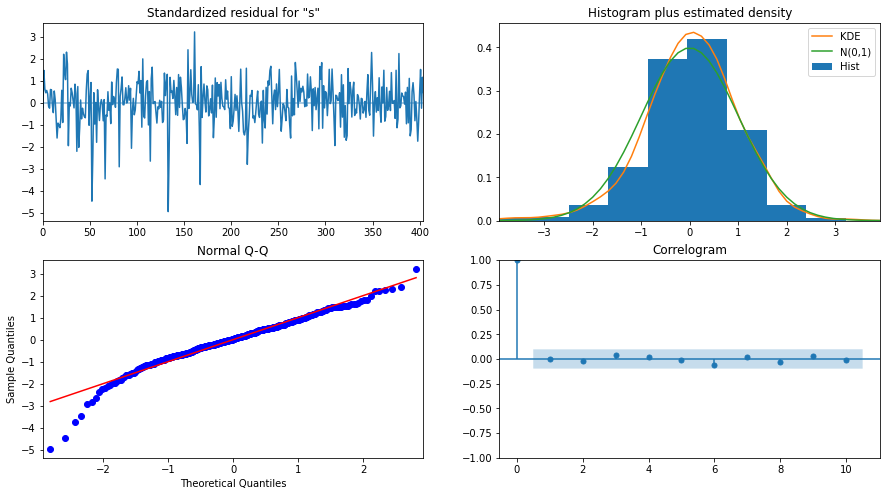

In [31]:
for i in selected_segment_id:
    arima_results = results[f"{i}"][-2]
    model = results[f"{i}"][-1]
    print(arima_results.mle_retvals)
    arima_results.plot_diagnostics(figsize=(15,8));

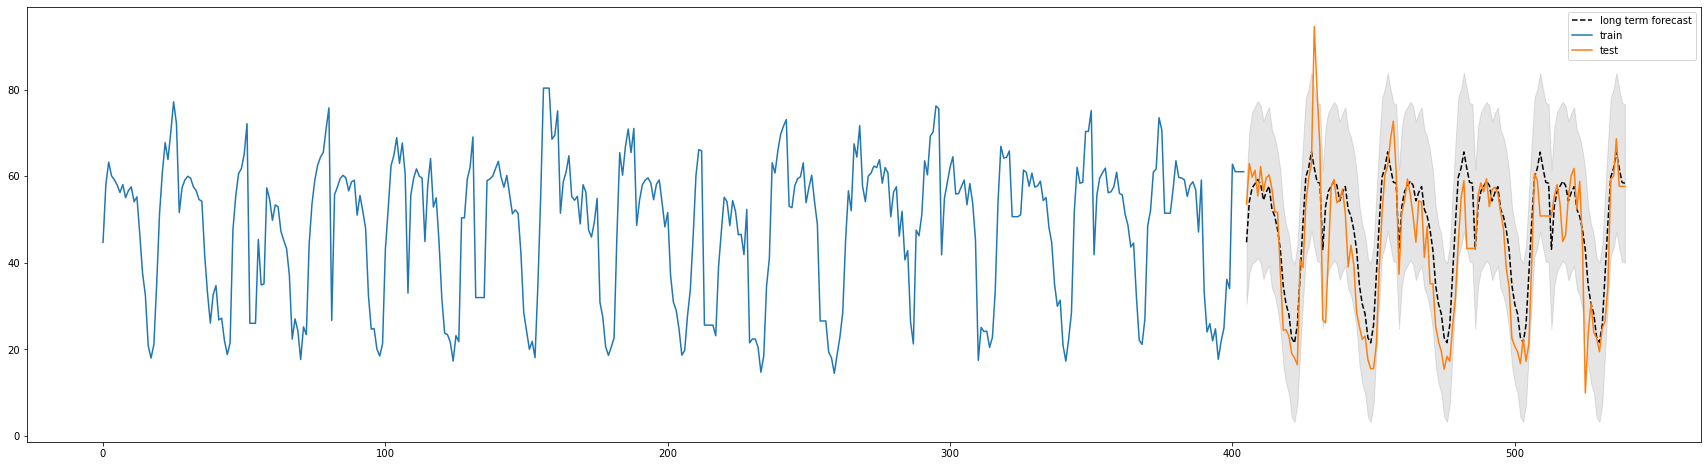

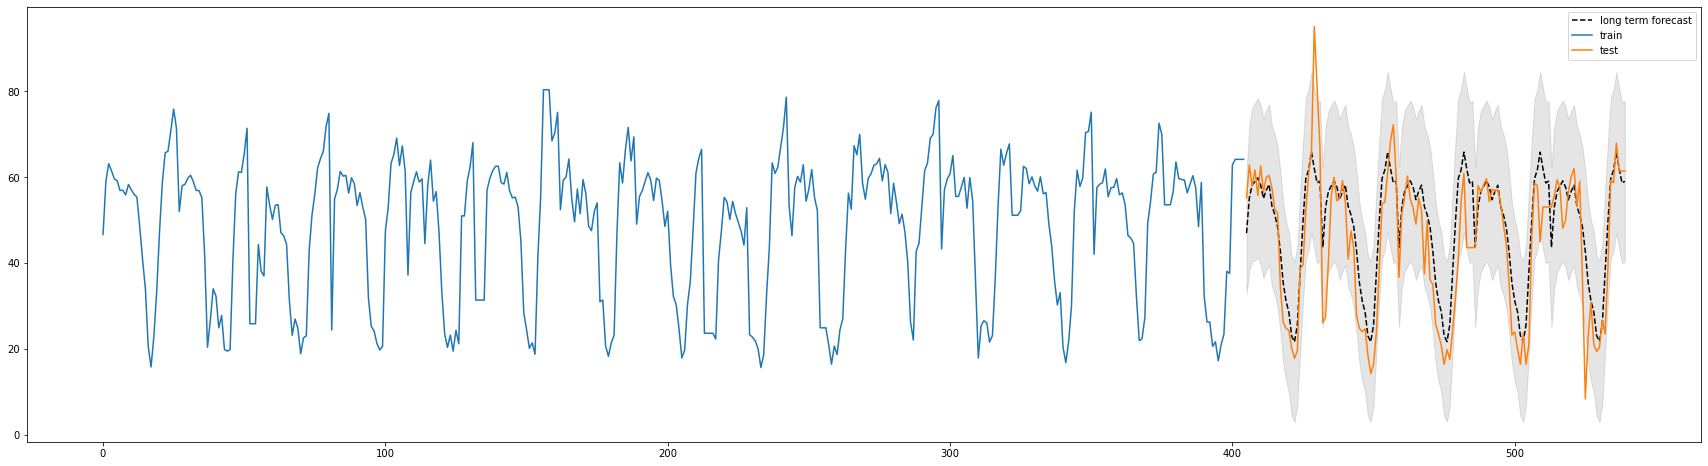

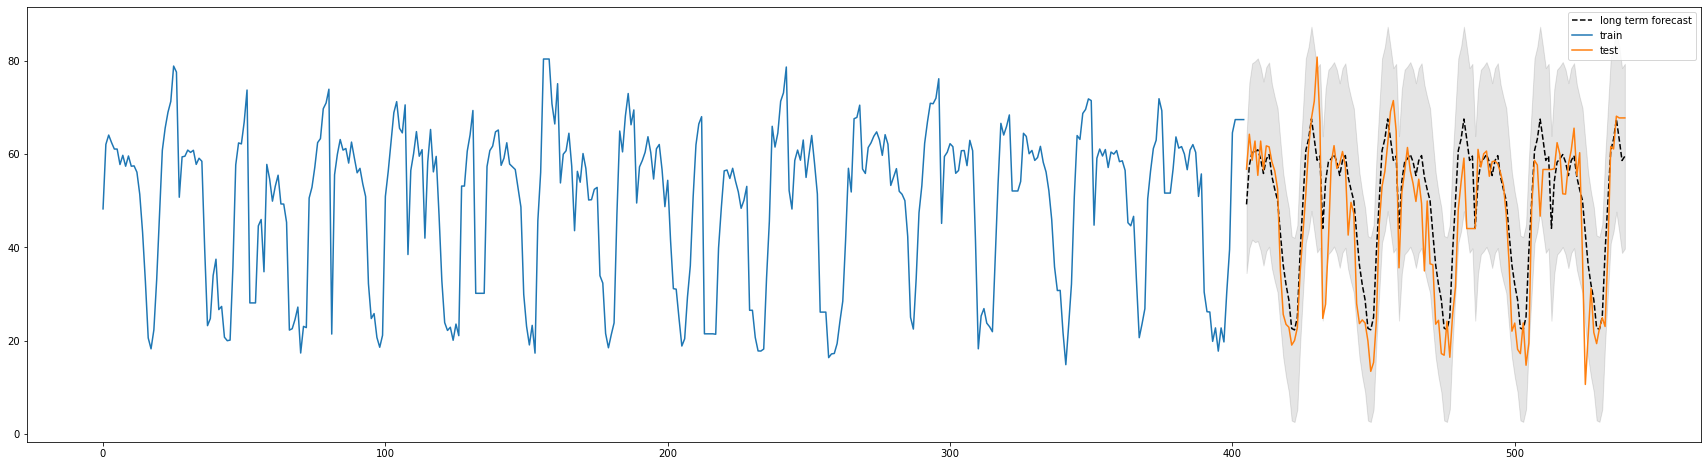

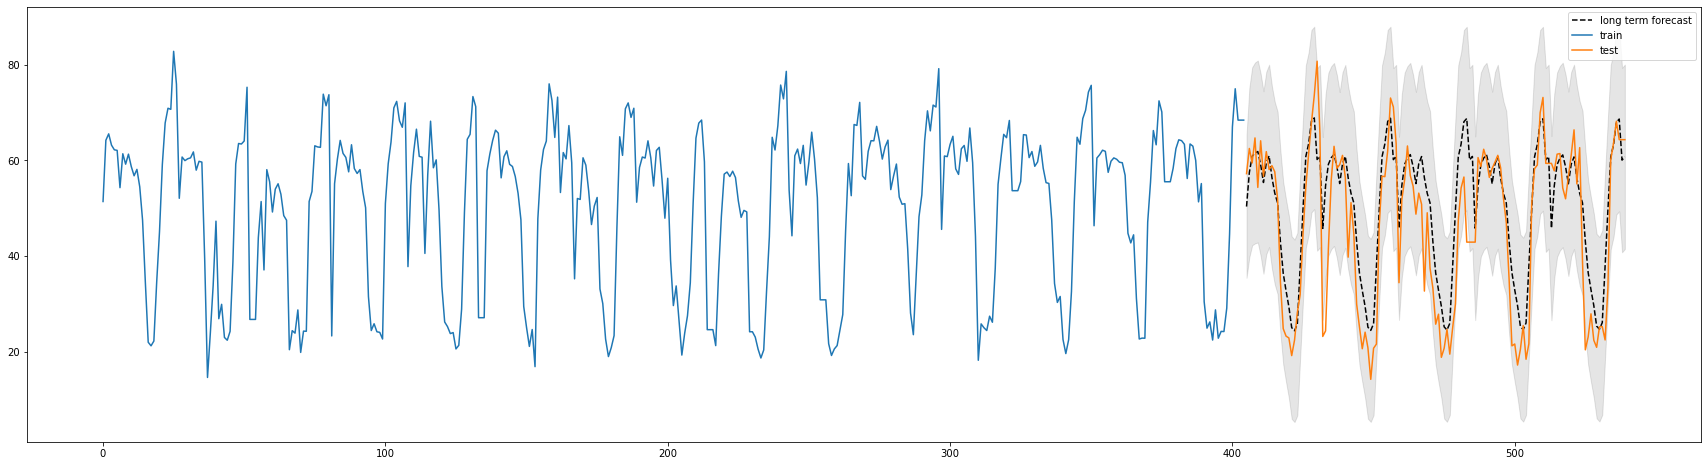

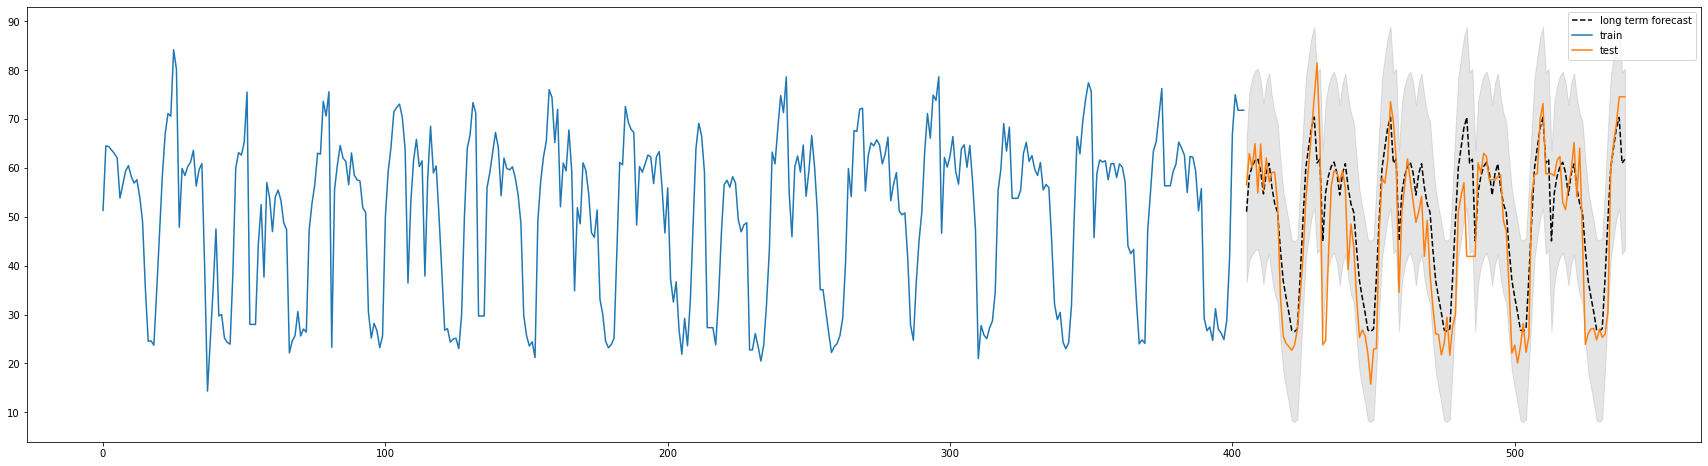

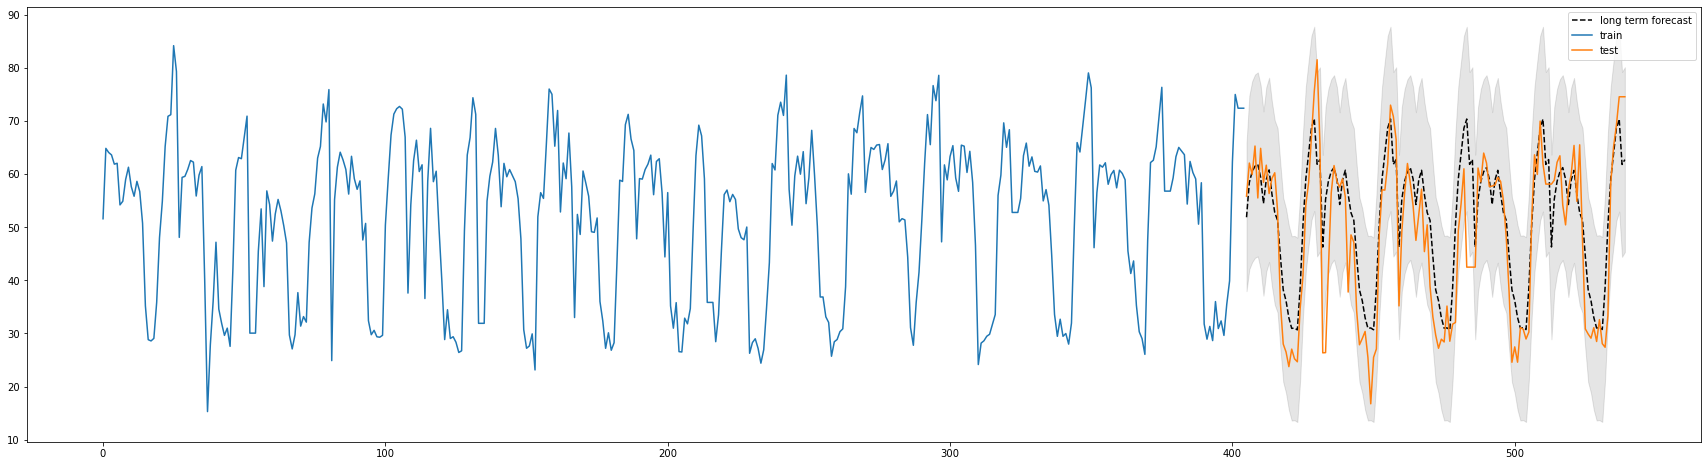

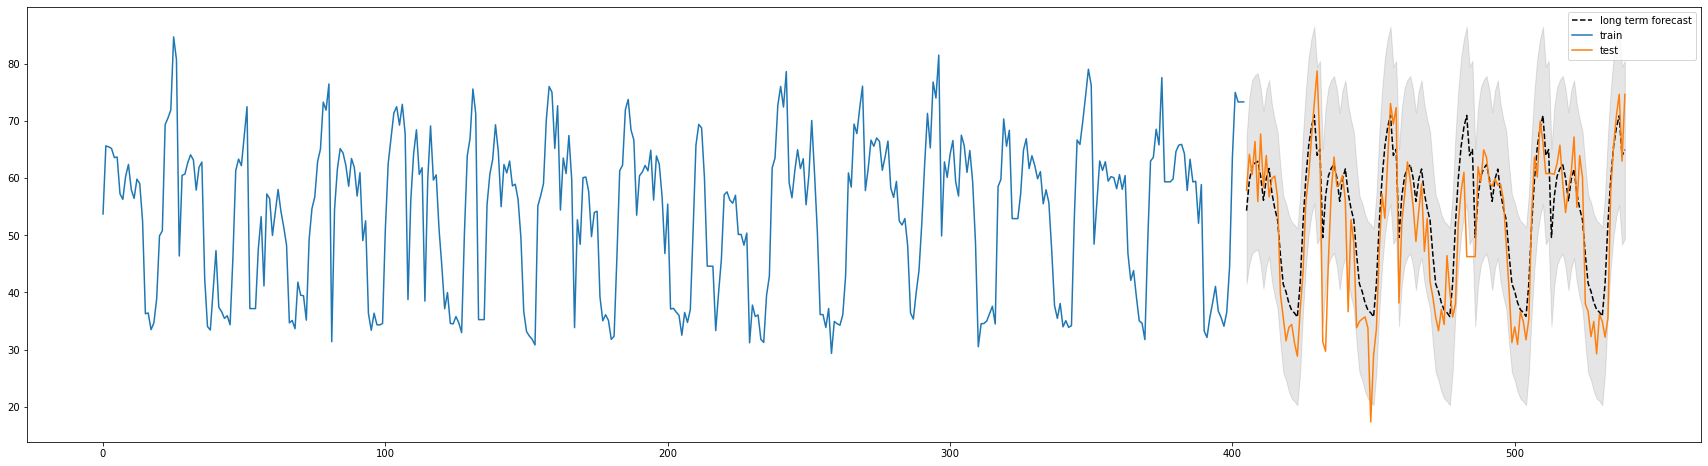

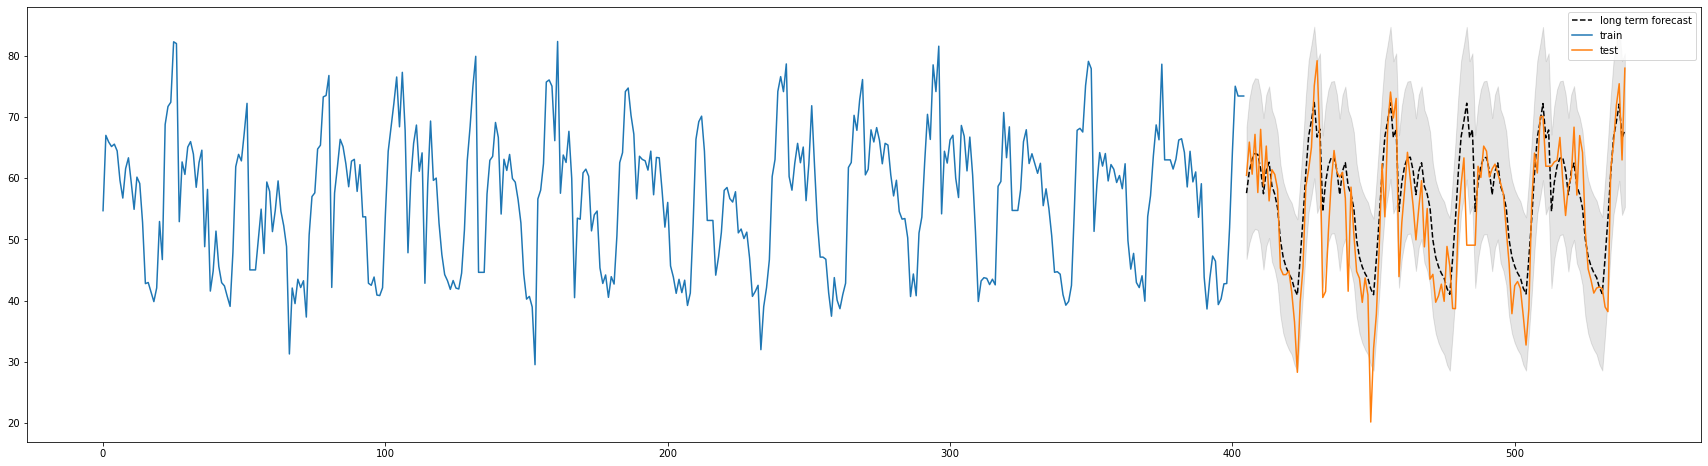

In [32]:
for i in selected_segment_id:    
    fcast_all = results[f"{i}"][-2].get_forecast(seasonal_lag * 5).summary_frame(alpha=0.05)

    fig, ax = plt.subplots(figsize=(30, 8))

    fcast_all['mean'].plot(ax=ax, style='k--', label="long term forecast", legend=True)

    aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{i}", ax=ax, label="train", legend=True);
    aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{i}", ax=ax, label="test",legend=True);
    ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='k', alpha=0.1);

In [33]:
prediction = pd.DataFrame()

for i in selected_segment_id:
    
    fcast = results[f"{i}"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
    segment_prediction = pd.Series(fcast["mean"])
    dyn_arima_results = results[f"{i}"][-2]
    
    for day in range(1,5):
        dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == day), f"segment_{i}"])
        fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
        segment_prediction = segment_prediction.append(fcast["mean"])
    
    
    segment_prediction = segment_prediction.rename(f"segment_{i}")
    
    prediction = pd.concat([prediction, segment_prediction], axis=1)

In [34]:
prediction

segment_12  segment_13  segment_14  segment_15  segment_16  segment_17  \
405   44.734372   47.003566   49.196900   50.361105   51.056464   51.886504   
406   54.142771   55.217194   57.545084   57.488766   58.370140   58.450972   
407   57.317107   58.225091   60.541284   60.866848   60.346368   60.466430   
408   58.228862   58.979869   60.483223   61.565829   61.495258   61.500180   
409   59.245573   59.860848   60.903762   61.871416   61.893218   61.831729   
..          ...         ...         ...         ...         ...         ...   
535   60.998694   60.548277   61.812067   61.677294   62.618433   62.455201   
536   63.834557   63.985804   65.381064   66.830924   67.194709   67.798750   
537   62.266385   62.528850   62.412964   67.685608   69.252501   68.681782   
538   59.184675   59.461439   59.609717   60.854311   61.372306   62.095381   
539   57.579910   58.303220   59.165602   59.817693   60.677764   61.697353   

     segment_18  segment_19  
405   54.305376   57.544186  
406   59.577707   61.146441  
407   61.973271   63.125812  
408   62.639870   64.008215  
409   62.935517   63.850645  
..          ...         ...  
535   63.448209   64.102309  
536   67.905843   68.412697  
537   69.151200   70.322036  
538   63.748414   65.777836  
539   63.922161   65.946202  

[135 rows x 8 columns]

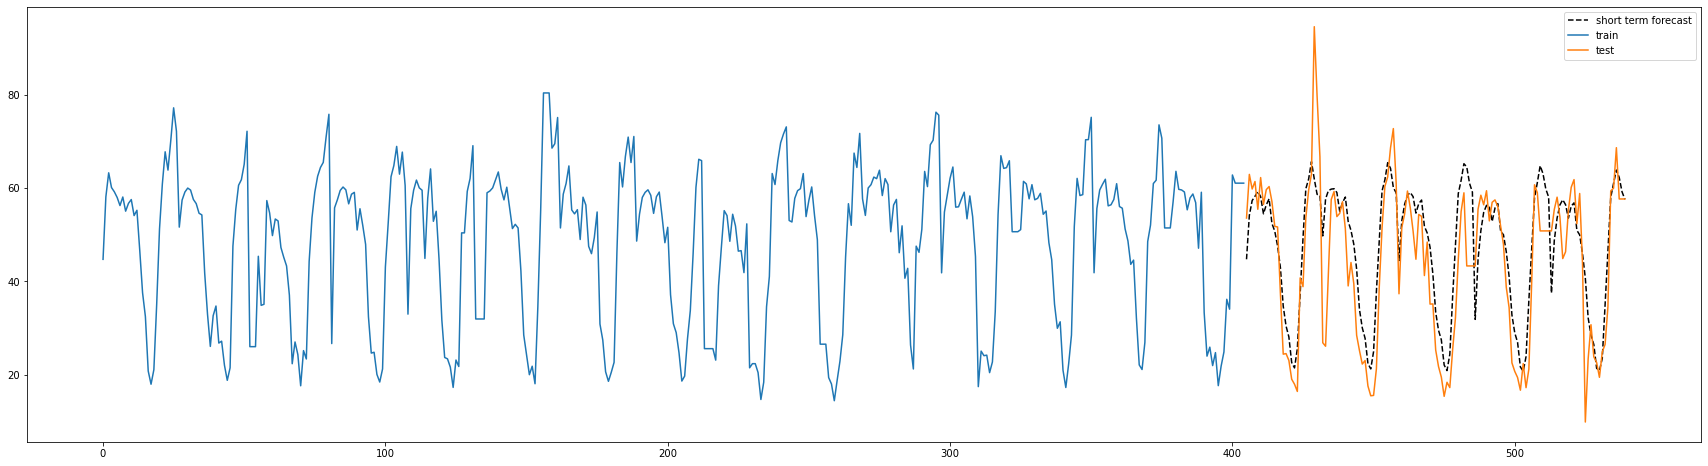

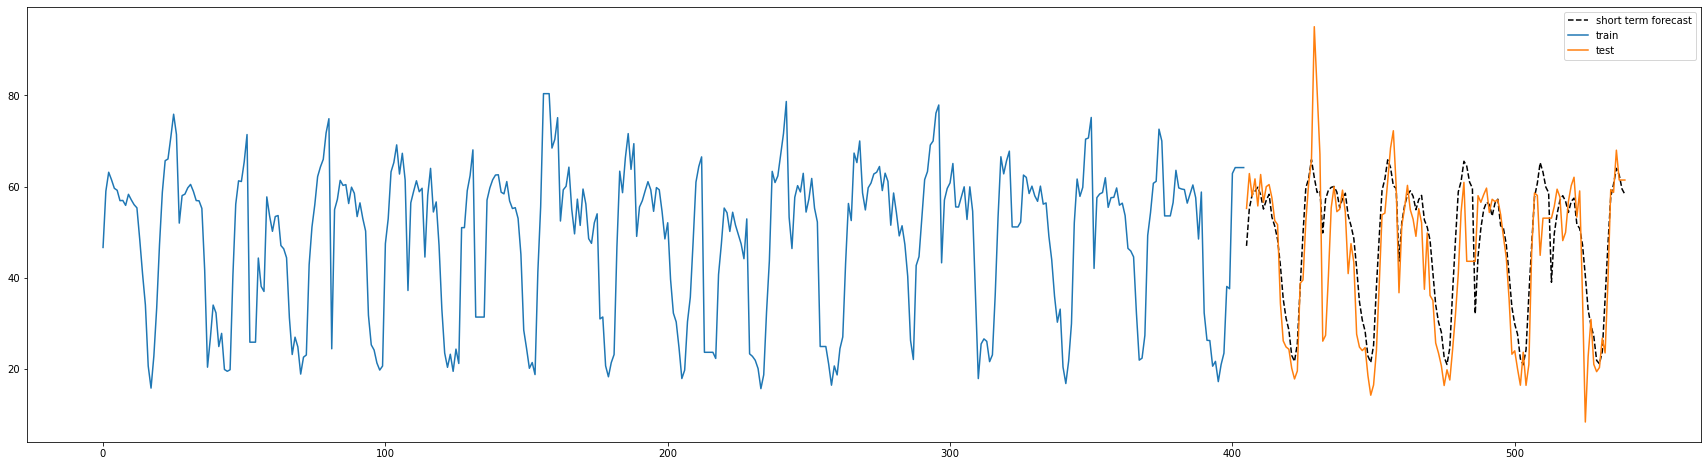

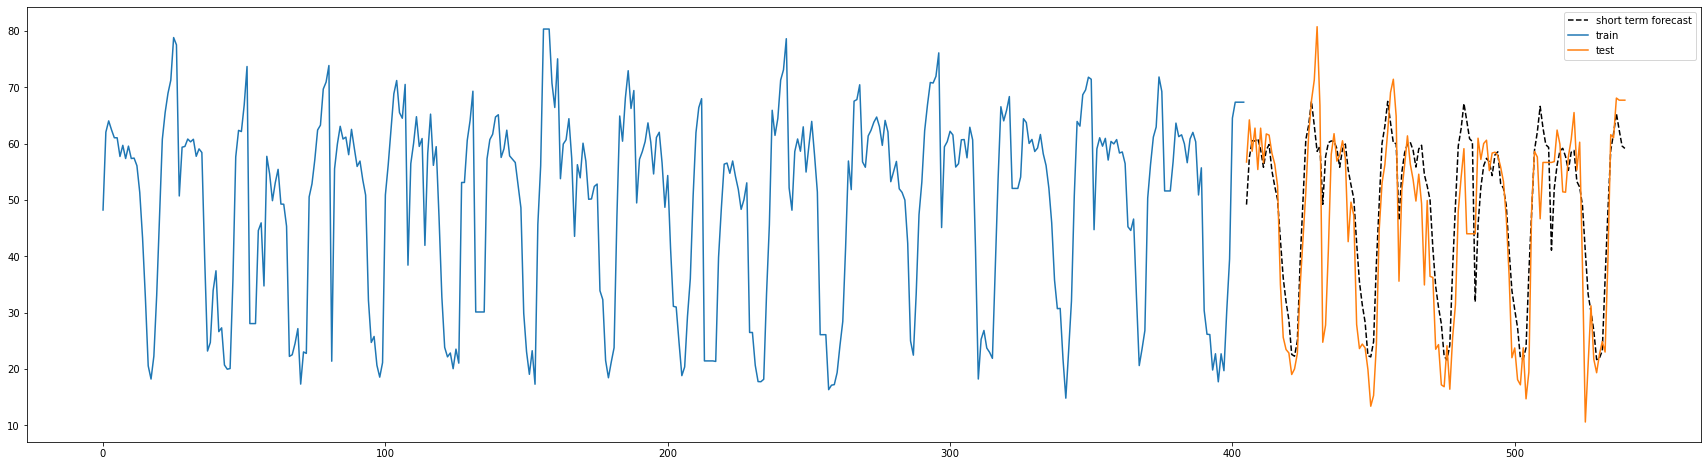

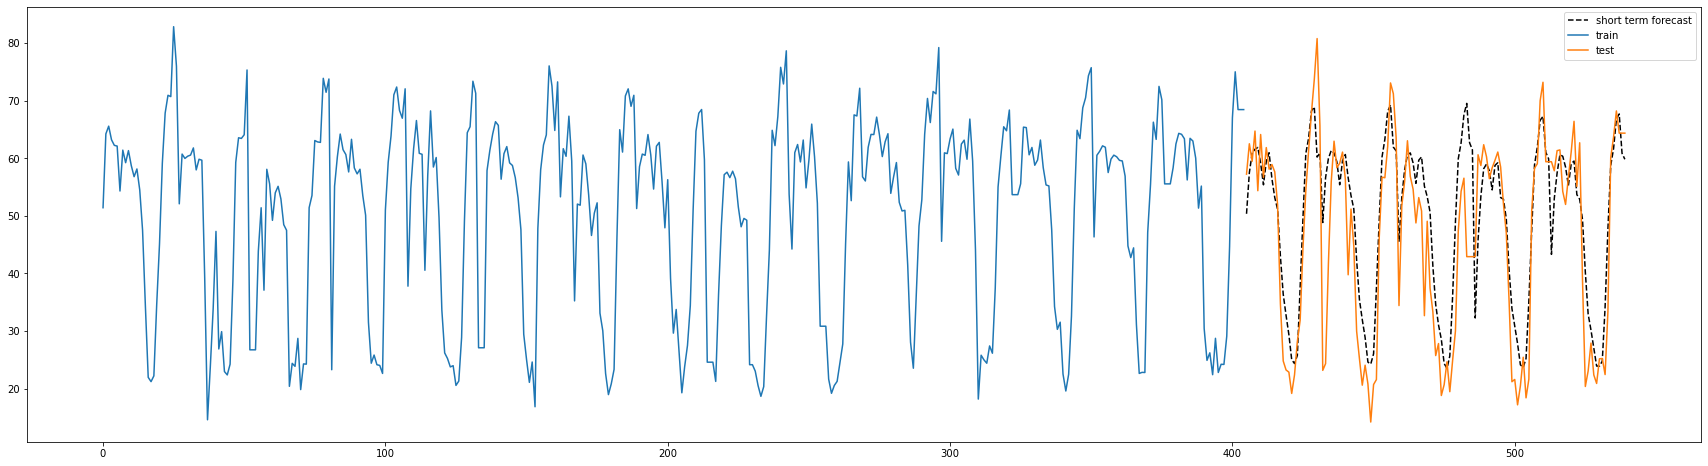

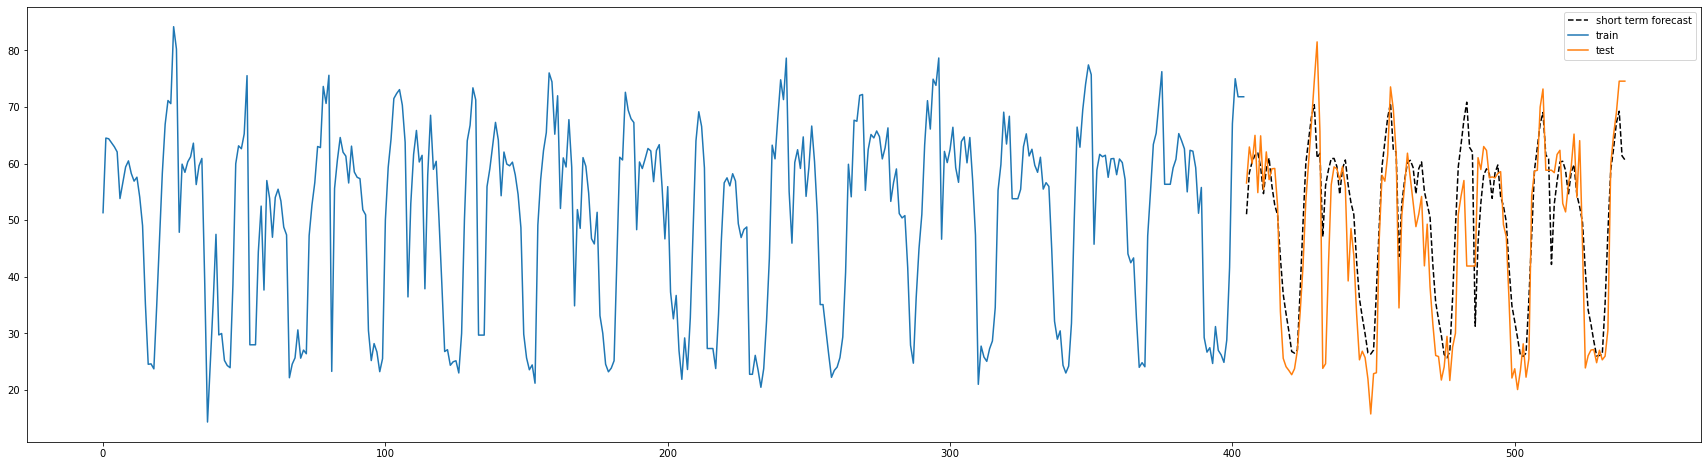

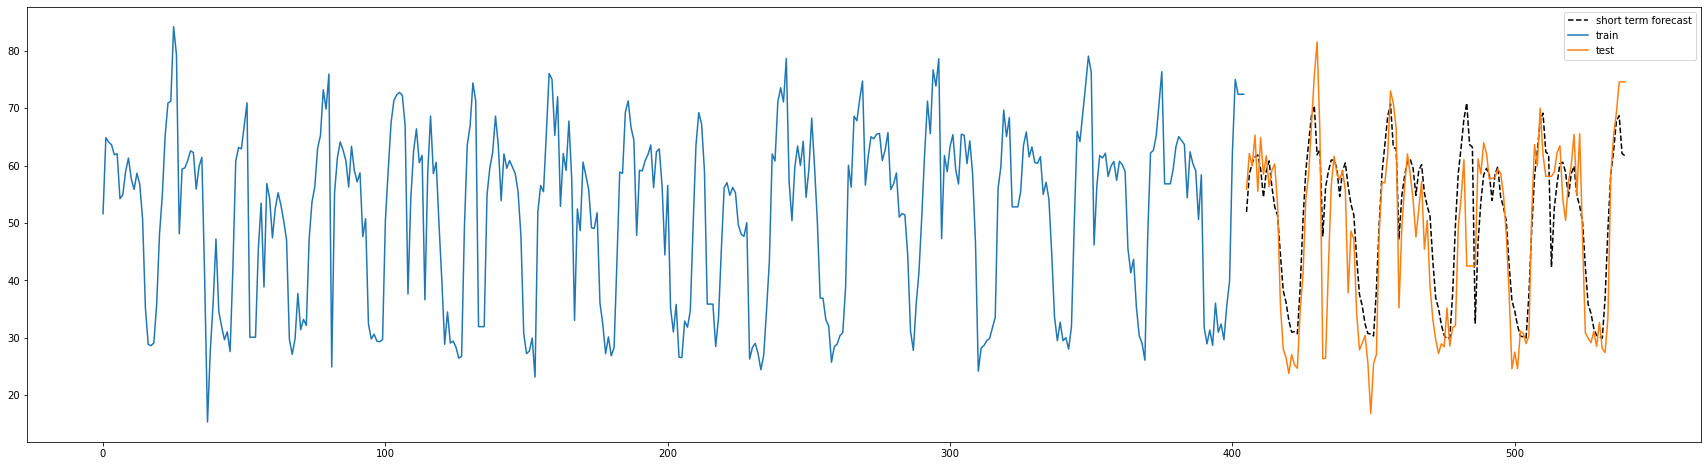

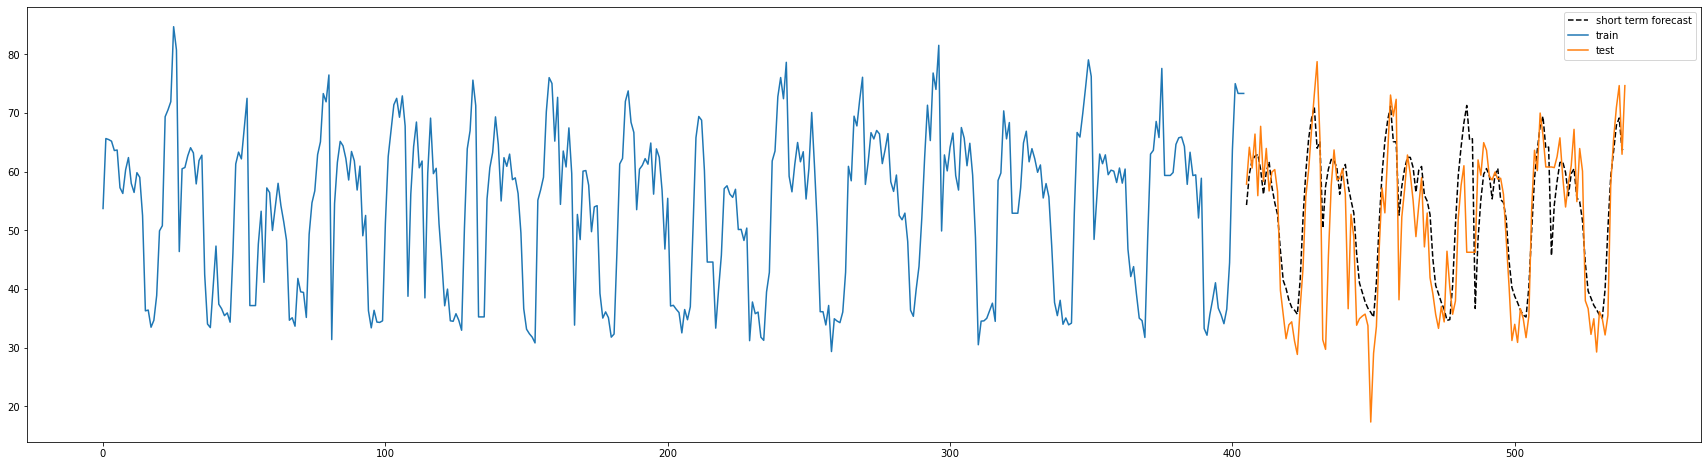

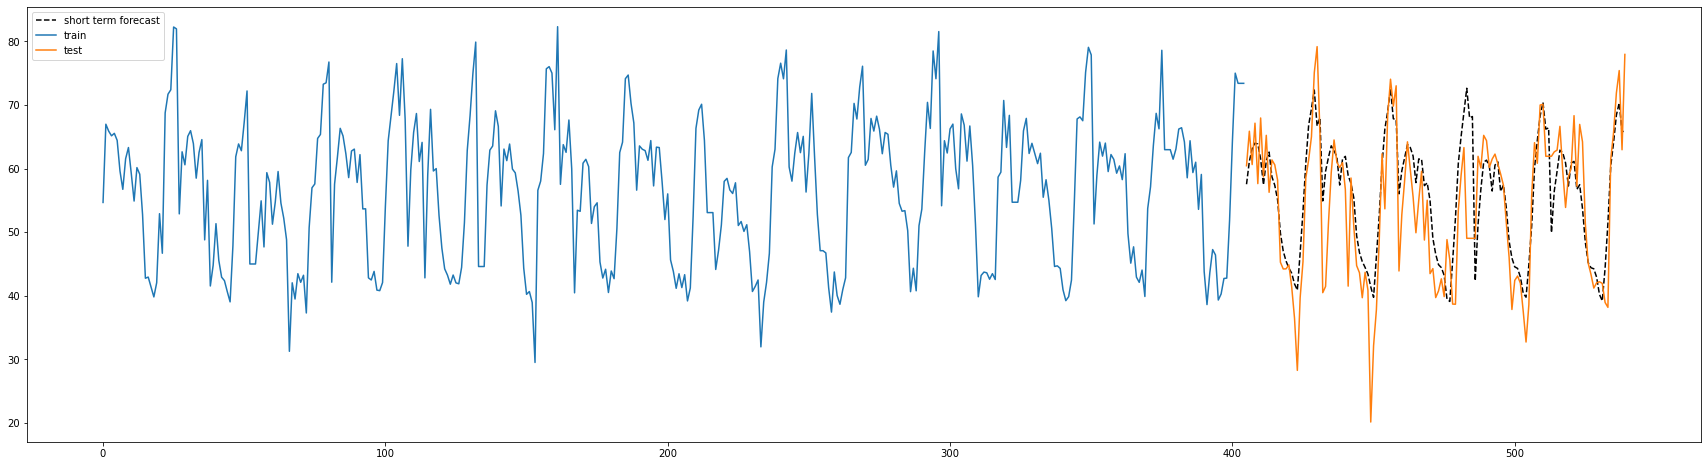

In [35]:
for segment_id in selected_segment_id:
# segment_id = 52

    fig, ax = plt.subplots(figsize=(30, 8))

    prediction.plot(ax=ax, style='k--', label="short term forecast", y=f"segment_{segment_id}", legend=True)
    aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
    aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="test",legend=True);


In [36]:
# # one day forecast
# fcast = results[f"48"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)

# # collect
# prediction = pd.Series(fcast["mean"])

# #plot
# fig, ax = plt.subplots(figsize=(30, 8))
# fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
# aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y="segment_48", ax=ax, label="train", legend=True);
# aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y="segment_48", ax=ax, label="test",legend=True);
# fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
# ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);

# # copy arima result object
# dyn_arima_results = results[f"48"][-2]

# for i in range(1,5):
#     # append true data to arima model to make dynamic forecast
#     dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == i), "segment_48"])
#     # make 1 day forecast
#     fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
#     #collect
#     prediction = prediction.append(fcast["mean"])
    
#     # plot
#     fig, ax = plt.subplots(figsize=(30, 8))
    
#     fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
#     aug_data.iloc[:-seasonal_lag * 5].plot(kind="line",y="segment_48", ax=ax, label="train", legend=True);
#     aug_data.iloc[-seasonal_lag * 5:].plot(kind="line",y="segment_48", ax=ax, label="test",legend=True);
#     fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
#     ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
#     ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);
    
# prediction = prediction.rename("segment_48_forecast")

In [37]:
# prediction

In [38]:
true = aug_data.iloc[-seasonal_lag * 5:,1:]
# true

In [39]:
static_prediction = pd.concat(
    [results[f"{segment}"][-2].get_forecast(seasonal_lag * 5).summary_frame(alpha=0.05)["mean"] for segment in selected_segment_id],
    axis=1)
static_prediction.columns= [f"segment_{segment}" for segment in selected_segment_id]

In [40]:
# error_df = pd.DataFrame(((true - prediction)/true).abs().mean())
# error_df.columns = ["mape"]
# error_df["rmse"] = np.sqrt((((true - prediction) ** 2).mean()))
# error_df


In [41]:
prediction

segment_12  segment_13  segment_14  segment_15  segment_16  segment_17  \
405   44.734372   47.003566   49.196900   50.361105   51.056464   51.886504   
406   54.142771   55.217194   57.545084   57.488766   58.370140   58.450972   
407   57.317107   58.225091   60.541284   60.866848   60.346368   60.466430   
408   58.228862   58.979869   60.483223   61.565829   61.495258   61.500180   
409   59.245573   59.860848   60.903762   61.871416   61.893218   61.831729   
..          ...         ...         ...         ...         ...         ...   
535   60.998694   60.548277   61.812067   61.677294   62.618433   62.455201   
536   63.834557   63.985804   65.381064   66.830924   67.194709   67.798750   
537   62.266385   62.528850   62.412964   67.685608   69.252501   68.681782   
538   59.184675   59.461439   59.609717   60.854311   61.372306   62.095381   
539   57.579910   58.303220   59.165602   59.817693   60.677764   61.697353   

     segment_18  segment_19  
405   54.305376   57.544186  
406   59.577707   61.146441  
407   61.973271   63.125812  
408   62.639870   64.008215  
409   62.935517   63.850645  
..          ...         ...  
535   63.448209   64.102309  
536   67.905843   68.412697  
537   69.151200   70.322036  
538   63.748414   65.777836  
539   63.922161   65.946202  

[135 rows x 8 columns]

In [42]:
prediction

segment_12  segment_13  segment_14  segment_15  segment_16  segment_17  \
405   44.734372   47.003566   49.196900   50.361105   51.056464   51.886504   
406   54.142771   55.217194   57.545084   57.488766   58.370140   58.450972   
407   57.317107   58.225091   60.541284   60.866848   60.346368   60.466430   
408   58.228862   58.979869   60.483223   61.565829   61.495258   61.500180   
409   59.245573   59.860848   60.903762   61.871416   61.893218   61.831729   
..          ...         ...         ...         ...         ...         ...   
535   60.998694   60.548277   61.812067   61.677294   62.618433   62.455201   
536   63.834557   63.985804   65.381064   66.830924   67.194709   67.798750   
537   62.266385   62.528850   62.412964   67.685608   69.252501   68.681782   
538   59.184675   59.461439   59.609717   60.854311   61.372306   62.095381   
539   57.579910   58.303220   59.165602   59.817693   60.677764   61.697353   

     segment_18  segment_19  
405   54.305376   57.544186  
406   59.577707   61.146441  
407   61.973271   63.125812  
408   62.639870   64.008215  
409   62.935517   63.850645  
..          ...         ...  
535   63.448209   64.102309  
536   67.905843   68.412697  
537   69.151200   70.322036  
538   63.748414   65.777836  
539   63.922161   65.946202  

[135 rows x 8 columns]

In [43]:
prediction["aug_time"] = aug_data["aug_time"]

error_df = pd.DataFrame(((true - prediction) / true).abs().groupby(prediction["aug_time"].dt.day).mean().mean(axis=1))
error_df.columns = ["mape_short"]
error_df["rmse_short"] = np.sqrt( ((true - prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).mean(axis=1)
error_df["mape_long"] = ((true - static_prediction) / true).abs().groupby(prediction["aug_time"].dt.day).mean().mean(axis=1)
error_df["rmse_long"] = np.sqrt(((true - static_prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).mean(axis=1)
error_df.index = [f"day_{x}" for x in error_df.index]
error_df

mape_short  rmse_short  mape_long  rmse_long
day_23    0.123586    7.040627   0.123586   7.040627
day_24    0.246358   10.436545   0.243428  10.076215
day_25    0.223613   10.344747   0.231493  10.375961
day_26    0.139265    6.330629   0.137074   5.947026
day_27    0.170293    7.749236   0.181513   8.008384

In [44]:
peak_hours = pd.date_range("07:00 2018-01-01", periods=7, freq="30T")
peak_hours = peak_hours.append(pd.date_range("16:00 2018-01-01", periods=7, freq="30T"))
peak_hours_index = prediction.loc[prediction["aug_time"].dt.time.isin(peak_hours.time),:].index




In [45]:
multi_index = pd.MultiIndex.from_product([["overall","peak hours", "off peak hours"],["mape_short", "rmse_short", "mape_long","rmse_long"]])

error = pd.DataFrame(np.zeros((len(multi_index),5)), index=multi_index)

error.columns = np.arange(23,28)

error = error.T

error

overall                                peak hours                       \
   mape_short rmse_short mape_long rmse_long mape_short rmse_short mape_long   
23        0.0        0.0       0.0       0.0        0.0        0.0       0.0   
24        0.0        0.0       0.0       0.0        0.0        0.0       0.0   
25        0.0        0.0       0.0       0.0        0.0        0.0       0.0   
26        0.0        0.0       0.0       0.0        0.0        0.0       0.0   
27        0.0        0.0       0.0       0.0        0.0        0.0       0.0   

             off peak hours                                 
   rmse_long     mape_short rmse_short mape_long rmse_long  
23       0.0            0.0        0.0       0.0       0.0  
24       0.0            0.0        0.0       0.0       0.0  
25       0.0            0.0        0.0       0.0       0.0  
26       0.0            0.0        0.0       0.0       0.0  
27       0.0            0.0        0.0       0.0       0.0

In [46]:
# error["overall","mape_short"] = 5

# overall
error["overall","mape_short"] = ((true - prediction) / true).abs().groupby(prediction["aug_time"].dt.day).mean().mean(axis=1)
error["overall","mape_long"] = ((true - static_prediction) / true).abs().groupby(prediction["aug_time"].dt.day).mean().mean(axis=1)

error["overall", "rmse_short"] = np.sqrt( ((true - prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).mean(axis=1)
error["overall", "rmse_long"] = np.sqrt( ((true - static_prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).mean(axis=1)



error["peak hours","mape_short"] = ((true.loc[peak_hours_index] - prediction.loc[peak_hours_index]) / true.loc[peak_hours_index]).abs().groupby(prediction.loc[peak_hours_index, "aug_time"].dt.day).mean().mean(axis=1)
error["peak hours","mape_long"] = ((true.loc[peak_hours_index] - static_prediction.loc[peak_hours_index]) / true.loc[peak_hours_index]).abs().groupby(prediction.loc[peak_hours_index, "aug_time"].dt.day).mean().mean(axis=1)

error["peak hours", "rmse_short"] = np.sqrt( ((true.loc[peak_hours_index] - prediction.loc[peak_hours_index]) ** 2).groupby(prediction.loc[peak_hours_index, "aug_time"].dt.day).mean()).mean(axis=1)
error["peak hours", "rmse_long"] = np.sqrt( ((true.loc[peak_hours_index] - static_prediction.loc[peak_hours_index]) ** 2).groupby(prediction.loc[peak_hours_index, "aug_time"].dt.day).mean()).mean(axis=1)



error["off peak hours","mape_short"] = ((true.drop(peak_hours_index) - prediction.drop(peak_hours_index)) / true.drop(peak_hours_index)).abs().groupby(prediction.drop(peak_hours_index)["aug_time"].dt.day).mean().mean(axis=1)
error["off peak hours","mape_long"] = ((true.drop(peak_hours_index) - static_prediction.drop(peak_hours_index)) / true.drop(peak_hours_index)).abs().groupby(prediction.drop(peak_hours_index)["aug_time"].dt.day).mean().mean(axis=1)

error["off peak hours", "rmse_short"] = np.sqrt( ((true.drop(peak_hours_index) - prediction.drop(peak_hours_index)) ** 2).groupby(prediction.drop(peak_hours_index)["aug_time"].dt.day).mean()).mean(axis=1)
error["off peak hours", "rmse_long"] = np.sqrt( ((true.drop(peak_hours_index) - static_prediction.drop(peak_hours_index)) ** 2).groupby(prediction.drop(peak_hours_index)["aug_time"].dt.day).mean()).mean(axis=1)

error.index = [f"day_{x}" for x in error.index]


In [47]:
error

overall                                 peak hours             \
       mape_short rmse_short mape_long  rmse_long mape_short rmse_short   
day_23   0.123586   7.040627  0.123586   7.040627   0.088195   7.875821   
day_24   0.246358  10.436545  0.243428  10.076215   0.090803   6.513340   
day_25   0.223613  10.344747  0.231493  10.375961   0.212985  11.942862   
day_26   0.139265   6.330629  0.137074   5.947026   0.064955   4.664206   
day_27   0.170293   7.749236  0.181513   8.008384   0.091335   6.176789   

                            off peak hours                                  
       mape_long  rmse_long     mape_short rmse_short mape_long  rmse_long  
day_23  0.088195   7.875821       0.161699   5.902022  0.161699   5.902022  
day_24  0.091852   6.566904       0.413879  13.426932  0.406664  12.807597  
day_25  0.211948  11.717416       0.235058   8.238779  0.252542   8.643507  
day_26  0.056695   4.287090       0.219292   7.652088  0.223636   7.204137  
day_27  0.089739   6.316334       0.255324   8.985676  0.280347   9.326212

In [48]:
# error.to_excel("kutup.xlsx")

In [49]:
prediction

segment_12  segment_13  segment_14  segment_15  segment_16  segment_17  \
405   44.734372   47.003566   49.196900   50.361105   51.056464   51.886504   
406   54.142771   55.217194   57.545084   57.488766   58.370140   58.450972   
407   57.317107   58.225091   60.541284   60.866848   60.346368   60.466430   
408   58.228862   58.979869   60.483223   61.565829   61.495258   61.500180   
409   59.245573   59.860848   60.903762   61.871416   61.893218   61.831729   
..          ...         ...         ...         ...         ...         ...   
535   60.998694   60.548277   61.812067   61.677294   62.618433   62.455201   
536   63.834557   63.985804   65.381064   66.830924   67.194709   67.798750   
537   62.266385   62.528850   62.412964   67.685608   69.252501   68.681782   
538   59.184675   59.461439   59.609717   60.854311   61.372306   62.095381   
539   57.579910   58.303220   59.165602   59.817693   60.677764   61.697353   

     segment_18  segment_19            aug_time  
405   54.305376   57.544186 2019-12-23 06:00:00  
406   59.577707   61.146441 2019-12-23 06:30:00  
407   61.973271   63.125812 2019-12-23 07:00:00  
408   62.639870   64.008215 2019-12-23 07:30:00  
409   62.935517   63.850645 2019-12-23 08:00:00  
..          ...         ...                 ...  
535   63.448209   64.102309 2019-12-27 17:00:00  
536   67.905843   68.412697 2019-12-27 17:30:00  
537   69.151200   70.322036 2019-12-27 18:00:00  
538   63.748414   65.777836 2019-12-27 18:30:00  
539   63.922161   65.946202 2019-12-27 19:00:00  

[135 rows x 9 columns]

In [50]:
prediction.loc[prediction["aug_time"].dt.day == 23]

segment_12  segment_13  segment_14  segment_15  segment_16  segment_17  \
405   44.734372   47.003566   49.196900   50.361105   51.056464   51.886504   
406   54.142771   55.217194   57.545084   57.488766   58.370140   58.450972   
407   57.317107   58.225091   60.541284   60.866848   60.346368   60.466430   
408   58.228862   58.979869   60.483223   61.565829   61.495258   61.500180   
409   59.245573   59.860848   60.903762   61.871416   61.893218   61.831729   
410   58.156255   58.191639   58.948569   59.131714   59.410269   59.402608   
411   54.474565   55.073140   55.821284   55.392565   54.695629   54.465282   
412   56.388470   57.002528   58.896389   59.471899   59.022481   59.013117   
413   57.704736   58.313465   59.866510   60.959077   60.962033   60.801996   
414   52.405913   53.291724   55.176852   56.443513   56.034483   56.238536   
415   50.762967   51.330600   52.440044   53.181639   52.664042   52.769172   
416   47.600819   48.399986   50.071307   51.146215   50.913590   51.307291   
417   42.952299   42.686450   42.922169   42.997764   43.314819   44.498732   
418   34.703802   35.377004   36.162216   36.398046   36.909692   38.214511   
419   30.436061   31.166195   31.974383   32.749787   33.488723   36.143948   
420   28.111272   28.585942   28.691321   29.401572   30.367382   32.952218   
421   22.615690   23.038964   22.605878   25.044541   26.801394   30.959205   
422   21.471756   21.700667   22.294111   24.373844   26.517728   31.024131   
423   25.592579   25.614199   24.989559   25.779954   27.046877   30.682434   
424   37.559878   37.874529   39.095828   37.857042   37.605978   38.606021   
425   49.182341   49.626426   49.898469   49.687190   49.365277   50.466382   
426   59.829856   59.709044   60.733757   60.822353   60.011282   59.083896   
427   61.925080   61.743509   63.268922   63.516441   64.222036   63.973686   
428   65.645810   65.892656   67.539896   68.225043   68.252316   68.693745   
429   61.926339   61.987054   63.211858   68.901637   70.412328   70.412197   
430   58.632597   58.704237   58.647531   60.202469   61.018566   61.856874   
431   58.406110   59.093748   59.572566   60.909241   61.823146   62.771277   

     segment_18  segment_19            aug_time  
405   54.305376   57.544186 2019-12-23 06:00:00  
406   59.577707   61.146441 2019-12-23 06:30:00  
407   61.973271   63.125812 2019-12-23 07:00:00  
408   62.639870   64.008215 2019-12-23 07:30:00  
409   62.935517   63.850645 2019-12-23 08:00:00  
410   60.377881   61.518131 2019-12-23 08:30:00  
411   56.126730   57.446141 2019-12-23 09:00:00  
412   59.942541   61.244500 2019-12-23 09:30:00  
413   61.687104   62.596920 2019-12-23 10:00:00  
414   57.378427   58.712629 2019-12-23 10:30:00  
415   54.718824   57.385607 2019-12-23 11:00:00  
416   52.662460   55.092549 2019-12-23 11:30:00  
417   46.539733   49.868602 2019-12-23 12:00:00  
418   41.442857   47.036190 2019-12-23 12:30:00  
419   40.079545   45.462452 2019-12-23 13:00:00  
420   38.109162   44.369302 2019-12-23 13:30:00  
421   36.869751   43.558325 2019-12-23 14:00:00  
422   36.382839   41.872096 2019-12-23 14:30:00  
423   35.686961   40.901257 2019-12-23 15:00:00  
424   41.496405   46.823339 2019-12-23 15:30:00  
425   51.985146   53.311964 2019-12-23 16:00:00  
426   59.907670   60.851204 2019-12-23 16:30:00  
427   65.596289   66.812787 2019-12-23 17:00:00  
428   68.975386   69.427632 2019-12-23 17:30:00  
429   71.048107   72.346530 2019-12-23 18:00:00  
430   63.989263   66.692624 2019-12-23 18:30:00  
431   65.060233   67.989601 2019-12-23 19:00:00

In [51]:
dti = pd.date_range("07:00 2018-01-01", periods=7, freq="30T")

In [52]:
dti = dti.append(pd.date_range("16:00 2018-01-01", periods=7, freq="30T"))

In [53]:
dti.time

array([datetime.time(7, 0), datetime.time(7, 30), datetime.time(8, 0),
       datetime.time(8, 30), datetime.time(9, 0), datetime.time(9, 30),
       datetime.time(10, 0), datetime.time(16, 0), datetime.time(16, 30),
       datetime.time(17, 0), datetime.time(17, 30), datetime.time(18, 0),
       datetime.time(18, 30), datetime.time(19, 0)], dtype=object)

In [54]:
aq = prediction["aug_time"].dt.time

aq.iloc[0]

datetime.time(6, 0)

In [55]:
pd.date_range("11:00", "21:30", freq="30min")

DatetimeIndex(['2021-07-08 11:00:00', '2021-07-08 11:30:00',
               '2021-07-08 12:00:00', '2021-07-08 12:30:00',
               '2021-07-08 13:00:00', '2021-07-08 13:30:00',
               '2021-07-08 14:00:00', '2021-07-08 14:30:00',
               '2021-07-08 15:00:00', '2021-07-08 15:30:00',
               '2021-07-08 16:00:00', '2021-07-08 16:30:00',
               '2021-07-08 17:00:00', '2021-07-08 17:30:00',
               '2021-07-08 18:00:00', '2021-07-08 18:30:00',
               '2021-07-08 19:00:00', '2021-07-08 19:30:00',
               '2021-07-08 20:00:00', '2021-07-08 20:30:00',
               '2021-07-08 21:00:00', '2021-07-08 21:30:00'],
              dtype='datetime64[ns]', freq='30T')

In [56]:
# fig, ax = plt.subplots(figsize=(30, 8))
# dyn_arima_results.fittedvalues.iloc[-seasonal_lag * 5:].plot(ax=ax, style='k--', label="dynamic forecast day-by-day", legend=True)
# aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
# aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);


    

In [57]:
# dyn_arima_results.model.data.orig_endog

In [58]:
segments.loc[segments["segment_id"].isin(selected_segment_id),"calc_length"]

11    153.411257
12     60.325290
13    111.709636
14     58.956197
15     99.407691
16    148.656277
17    127.447867
18    231.605696
Name: calc_length, dtype: float64

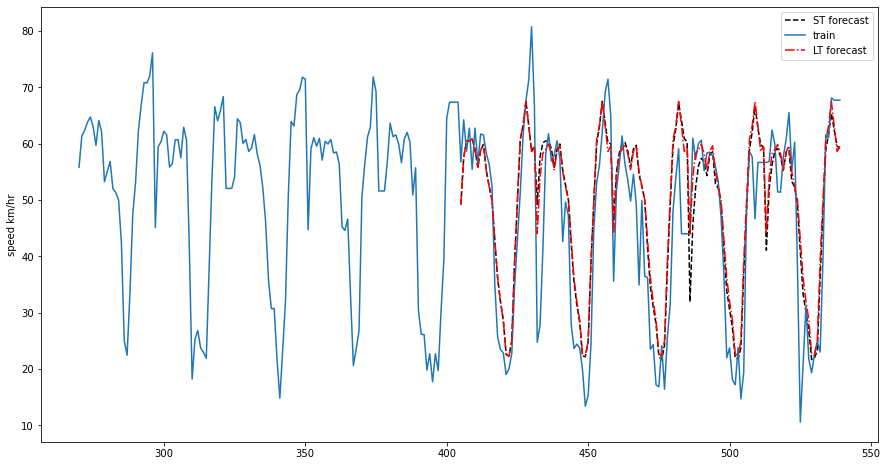

In [59]:
segment_id = 14

fig, ax = plt.subplots(figsize=(15, 8))

prediction.plot(ax=ax, style='k--', label="ST forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[seasonal_lag*10:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
static_prediction.plot(ax=ax, style='r-.', label="LT forecast", y=f"segment_{segment_id}", legend=True)


ax.set_ylabel("speed km/hr");


fig.savefig(f'ace/{segment_id}.png')

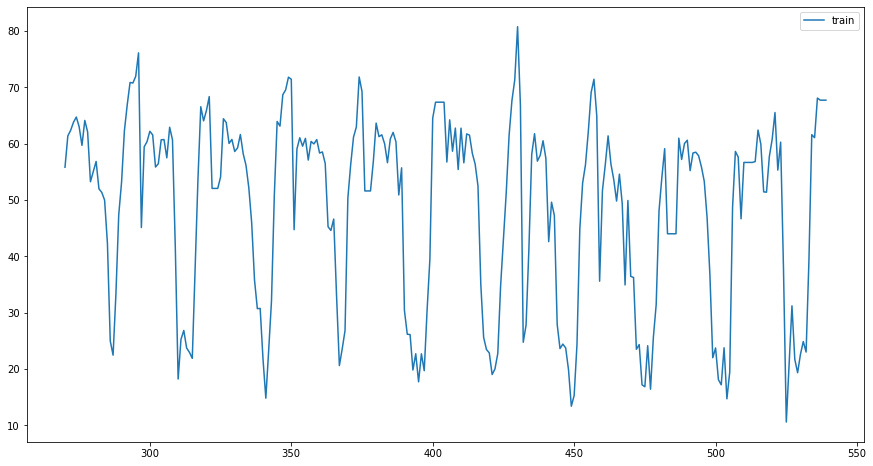

In [60]:
segment_id = 14

fig, ax = plt.subplots(figsize=(15, 8))

# prediction.plot(ax=ax, style='k--', label="ST forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[seasonal_lag*10:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
# static_prediction.plot(ax=ax, style='r-.', label="LT forecast", y=f"segment_{segment_id}", legend=True)

In [61]:

((true - prediction)/true).abs().groupby(prediction["aug_time"].dt.day).mean().to_excel("ace/sc-a-short_term_MAPE.xlsx")
np.sqrt( ((true - prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).to_excel("ace/sc-a-short_term_RMSE.xlsx")


((true - static_prediction)/true).abs().groupby(prediction["aug_time"].dt.day).mean().to_excel("ace/sc-a-long_term_MAPE.xlsx")
np.sqrt( ((true - static_prediction) ** 2).groupby(prediction["aug_time"].dt.day).mean()).to_excel("ace/sc-a-long_term_RMSE.xlsx")


In [62]:
aug_data["aug_time_str"] = aug_data["aug_time"].dt.strftime("%d/%m")

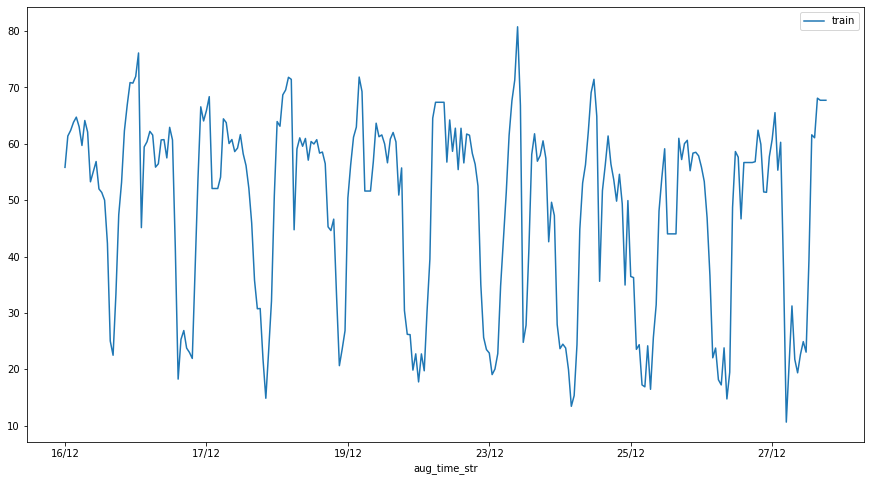

In [63]:
segment_id = 14

fig, ax = plt.subplots(figsize=(15, 8))

# prediction.plot(ax=ax, style='k--', label="ST forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[seasonal_lag*10:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train",x="aug_time_str", legend=True);


In [64]:
fig.savefig(f'ace/xlabel.png')

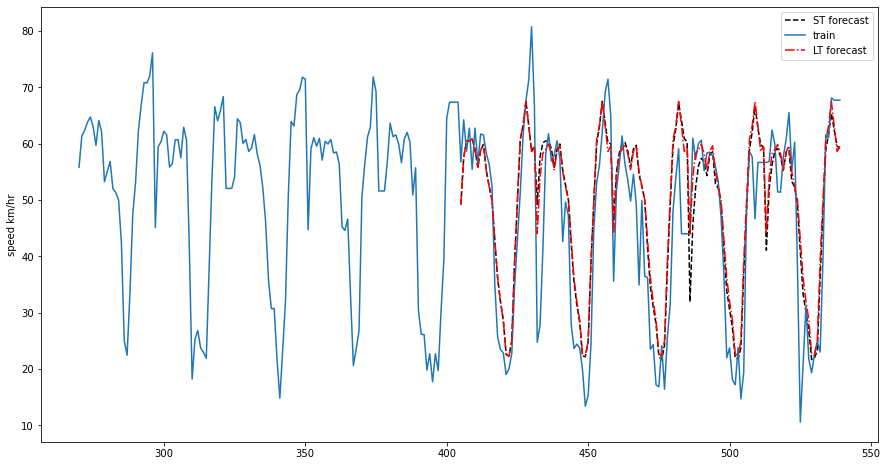

In [65]:
segment_id = 14

fig, ax = plt.subplots(figsize=(15, 8))

prediction.plot(ax=ax, style='k--', label="ST forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[seasonal_lag*10:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
static_prediction.plot(ax=ax, style='r-.', label="LT forecast", y=f"segment_{segment_id}", legend=True)


ax.set_ylabel("speed km/hr");


# fig.savefig(f'ace/{segment_id}.png')

In [66]:
prediction.index = prediction.index + 41
aug_data.index = aug_data.index + 41
static_prediction.index = static_prediction.index + 41

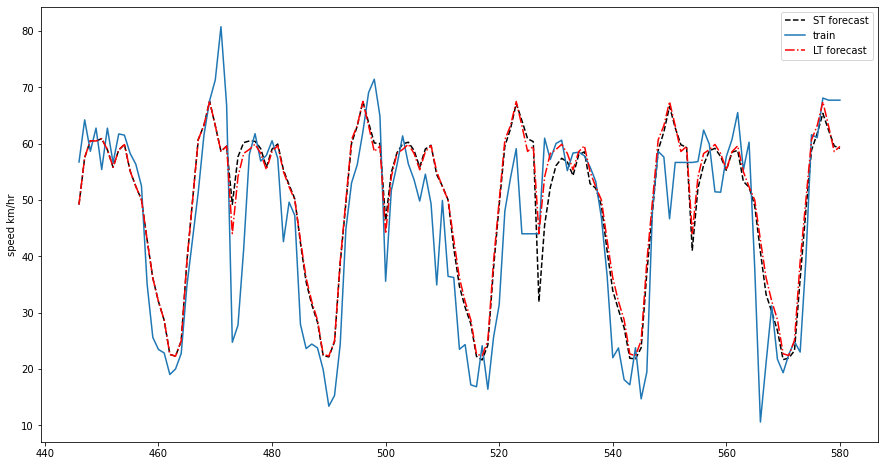

In [75]:
segment_id = 14

fig, ax = plt.subplots(figsize=(15, 8))

prediction.plot(ax=ax, style='k--', label="ST forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[seasonal_lag*15:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
static_prediction.plot(ax=ax, style='r-.', label="LT forecast", y=f"segment_{segment_id}", legend=True)


ax.set_ylabel("speed km/hr");

In [76]:
fig.savefig(f'ace/{segment_id}_lt_st.png')

In [ ]:
selected_segments